# DonorsChoose

<p>
DonorsChoose.org receives hundreds of thousands of project proposals each year for classroom projects in need of funding. Right now, a large number of volunteers is needed to manually screen each submission before it's approved to be posted on the DonorsChoose.org website.
</p>
<p>
    Next year, DonorsChoose.org expects to receive close to 500,000 project proposals. As a result, there are three main problems they need to solve:
<ul>
<li>
    How to scale current manual processes and resources to screen 500,000 projects so that they can be posted as quickly and as efficiently as possible</li>
    <li>How to increase the consistency of project vetting across different volunteers to improve the experience for teachers</li>
    <li>How to focus volunteer time on the applications that need the most assistance</li>
    </ul>
</p>    
<p>
The goal of the competition is to predict whether or not a DonorsChoose.org project proposal submitted by a teacher will be approved, using the text of project descriptions as well as additional metadata about the project, teacher, and school. DonorsChoose.org can then use this information to identify projects most likely to need further review before approval.
</p>

## About the DonorsChoose Data Set

The `train.csv` data set provided by DonorsChoose contains the following features:

Feature | Description 
----------|---------------
**`project_id`** | A unique identifier for the proposed project. **Example:** `p036502`   
**`project_title`**    | Title of the project. **Examples:**<br><ul><li><code>Art Will Make You Happy!</code></li><li><code>First Grade Fun</code></li></ul> 
**`project_grade_category`** | Grade level of students for which the project is targeted. One of the following enumerated values: <br/><ul><li><code>Grades PreK-2</code></li><li><code>Grades 3-5</code></li><li><code>Grades 6-8</code></li><li><code>Grades 9-12</code></li></ul>  
 **`project_subject_categories`** | One or more (comma-separated) subject categories for the project from the following enumerated list of values:  <br/><ul><li><code>Applied Learning</code></li><li><code>Care &amp; Hunger</code></li><li><code>Health &amp; Sports</code></li><li><code>History &amp; Civics</code></li><li><code>Literacy &amp; Language</code></li><li><code>Math &amp; Science</code></li><li><code>Music &amp; The Arts</code></li><li><code>Special Needs</code></li><li><code>Warmth</code></li></ul><br/> **Examples:** <br/><ul><li><code>Music &amp; The Arts</code></li><li><code>Literacy &amp; Language, Math &amp; Science</code></li>  
  **`school_state`** | State where school is located ([Two-letter U.S. postal code](https://en.wikipedia.org/wiki/List_of_U.S._state_abbreviations#Postal_codes)). **Example:** `WY`
**`project_subject_subcategories`** | One or more (comma-separated) subject subcategories for the project. **Examples:** <br/><ul><li><code>Literacy</code></li><li><code>Literature &amp; Writing, Social Sciences</code></li></ul> 
**`project_resource_summary`** | An explanation of the resources needed for the project. **Example:** <br/><ul><li><code>My students need hands on literacy materials to manage sensory needs!</code</li></ul> 
**`project_essay_1`**    | First application essay<sup>*</sup>  
**`project_essay_2`**    | Second application essay<sup>*</sup> 
**`project_essay_3`**    | Third application essay<sup>*</sup> 
**`project_essay_4`**    | Fourth application essay<sup>*</sup> 
**`project_submitted_datetime`** | Datetime when project application was submitted. **Example:** `2016-04-28 12:43:56.245`   
**`teacher_id`** | A unique identifier for the teacher of the proposed project. **Example:** `bdf8baa8fedef6bfeec7ae4ff1c15c56`  
**`teacher_prefix`** | Teacher's title. One of the following enumerated values: <br/><ul><li><code>nan</code></li><li><code>Dr.</code></li><li><code>Mr.</code></li><li><code>Mrs.</code></li><li><code>Ms.</code></li><li><code>Teacher.</code></li></ul>  
**`teacher_number_of_previously_posted_projects`** | Number of project applications previously submitted by the same teacher. **Example:** `2` 

<sup>*</sup> See the section <b>Notes on the Essay Data</b> for more details about these features.

Additionally, the `resources.csv` data set provides more data about the resources required for each project. Each line in this file represents a resource required by a project:

Feature | Description 
----------|---------------
**`id`** | A `project_id` value from the `train.csv` file.  **Example:** `p036502`   
**`description`** | Desciption of the resource. **Example:** `Tenor Saxophone Reeds, Box of 25`   
**`quantity`** | Quantity of the resource required. **Example:** `3`   
**`price`** | Price of the resource required. **Example:** `9.95`   

**Note:** Many projects require multiple resources. The `id` value corresponds to a `project_id` in train.csv, so you use it as a key to retrieve all resources needed for a project:

The data set contains the following label (the value you will attempt to predict):

Label | Description
----------|---------------
`project_is_approved` | A binary flag indicating whether DonorsChoose approved the project. A value of `0` indicates the project was not approved, and a value of `1` indicates the project was approved.

### Notes on the Essay Data

<ul>
Prior to May 17, 2016, the prompts for the essays were as follows:
<li>__project_essay_1:__ "Introduce us to your classroom"</li>
<li>__project_essay_2:__ "Tell us more about your students"</li>
<li>__project_essay_3:__ "Describe how your students will use the materials you're requesting"</li>
<li>__project_essay_3:__ "Close by sharing why your project will make a difference"</li>
</ul>


<ul>
Starting on May 17, 2016, the number of essays was reduced from 4 to 2, and the prompts for the first 2 essays were changed to the following:<br>
<li>__project_essay_1:__ "Describe your students: What makes your students special? Specific details about their background, your neighborhood, and your school are all helpful."</li>
<li>__project_essay_2:__ "About your project: How will these materials make a difference in your students' learning and improve their school lives?"</li>
<br>For all projects with project_submitted_datetime of 2016-05-17 and later, the values of project_essay_3 and project_essay_4 will be NaN.
</ul>


In [1]:
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

import sqlite3
import pandas as pd
import numpy as np
import nltk
import string
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from nltk.stem.porter import PorterStemmer

import re
# Tutorial about Python regular expressions: https://pymotw.com/2/re/
import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer

from gensim.models import Word2Vec
from gensim.models import KeyedVectors
import pickle

from tqdm import tqdm
import os

from plotly import plotly
import plotly.offline as offline
import plotly.graph_objs as go
offline.init_notebook_mode()
from collections import Counter

In [2]:
## import dill
# reload notebook
## dill.load_session('test_dill.env')

## 1.1 Reading Data

In [3]:
project_data = pd.read_csv('train_data.csv')
resource_data = pd.read_csv('resources.csv')

In [4]:
print("Number of data points in train data", project_data.shape)
print('-'*50)
print("The attributes of data :", project_data.columns.values)

Number of data points in train data (109248, 17)
--------------------------------------------------
The attributes of data : ['Unnamed: 0' 'id' 'teacher_id' 'teacher_prefix' 'school_state'
 'project_submitted_datetime' 'project_grade_category'
 'project_subject_categories' 'project_subject_subcategories'
 'project_title' 'project_essay_1' 'project_essay_2' 'project_essay_3'
 'project_essay_4' 'project_resource_summary'
 'teacher_number_of_previously_posted_projects' 'project_is_approved']


In [5]:
print("Number of data points in train data", resource_data.shape)
print(resource_data.columns.values)
resource_data.head(2)

Number of data points in train data (1541272, 4)
['id' 'description' 'quantity' 'price']


id                                        description  quantity  \
0  p233245  LC652 - Lakeshore Double-Space Mobile Drying Rack         1   
1  p069063        Bouncy Bands for Desks (Blue support pipes)         3   

    price  
0  149.00  
1   14.95

## 1.2 preprocessing of `project_subject_categories`

In [6]:
catogories = list(project_data['project_subject_categories'].values)
# remove special characters from list of strings python: https://stackoverflow.com/a/47301924/4084039

# https://www.geeksforgeeks.org/removing-stop-words-nltk-python/
# https://stackoverflow.com/questions/23669024/how-to-strip-a-specific-word-from-a-string
# https://stackoverflow.com/questions/8270092/remove-all-whitespace-in-a-string-in-python
cat_list = []
for i in catogories:
    temp = ""
    # consider we have text like this "Math & Science, Warmth, Care & Hunger"
    for j in i.split(','): # it will split it in three parts ["Math & Science", "Warmth", "Care & Hunger"]
        if 'The' in j.split(): # this will split each of the catogory based on space "Math & Science"=> "Math","&", "Science"
            j=j.replace('The','') # if we have the words "The" we are going to replace it with ''(i.e removing 'The')
        j = j.replace(' ','') # we are placeing all the ' '(space) with ''(empty) ex:"Math & Science"=>"Math&Science"
        temp+=j.strip()+" " #" abc ".strip() will return "abc", remove the trailing spaces
        temp = temp.replace('&','_') # we are replacing the & value into 
    cat_list.append(temp.strip())
    
project_data['clean_categories'] = cat_list
project_data.drop(['project_subject_categories'], axis=1, inplace=True)

from collections import Counter
my_counter = Counter()
for word in project_data['clean_categories'].values:
    my_counter.update(word.split())

cat_dict = dict(my_counter)
sorted_cat_dict = dict(sorted(cat_dict.items(), key=lambda kv: kv[1]))


## 1.3 preprocessing of `project_subject_subcategories`

In [7]:
sub_catogories = list(project_data['project_subject_subcategories'].values)
# remove special characters from list of strings python: https://stackoverflow.com/a/47301924/4084039

# https://www.geeksforgeeks.org/removing-stop-words-nltk-python/
# https://stackoverflow.com/questions/23669024/how-to-strip-a-specific-word-from-a-string
# https://stackoverflow.com/questions/8270092/remove-all-whitespace-in-a-string-in-python

sub_cat_list = []
for i in sub_catogories:
    temp = ""
    # consider we have text like this "Math & Science, Warmth, Care & Hunger"
    for j in i.split(','): # it will split it in three parts ["Math & Science", "Warmth", "Care & Hunger"]
        if 'The' in j.split(): # this will split each of the catogory based on space "Math & Science"=> "Math","&", "Science"
            j=j.replace('The','') # if we have the words "The" we are going to replace it with ''(i.e removing 'The')
        j = j.replace(' ','') # we are placeing all the ' '(space) with ''(empty) ex:"Math & Science"=>"Math&Science"
        temp +=j.strip()+" "#" abc ".strip() will return "abc", remove the trailing spaces
        temp = temp.replace('&','_')
    sub_cat_list.append(temp.strip())

project_data['clean_subcategories'] = sub_cat_list
project_data.drop(['project_subject_subcategories'], axis=1, inplace=True)

# count of all the words in corpus python: https://stackoverflow.com/a/22898595/4084039
my_counter = Counter()
for word in project_data['clean_subcategories'].values:
    my_counter.update(word.split())
    
sub_cat_dict = dict(my_counter)
sorted_sub_cat_dict = dict(sorted(sub_cat_dict.items(), key=lambda kv: kv[1]))

## 1.3 Text preprocessing

In [8]:
# merge two column text dataframe: 
project_data["essay"] = project_data["project_essay_1"].map(str) +\
                        project_data["project_essay_2"].map(str) + \
                        project_data["project_essay_3"].map(str) + \
                        project_data["project_essay_4"].map(str)

In [9]:
project_data.head(2)

Unnamed: 0       id                        teacher_id teacher_prefix  \
0      160221  p253737  c90749f5d961ff158d4b4d1e7dc665fc           Mrs.   
1      140945  p258326  897464ce9ddc600bced1151f324dd63a            Mr.   

  school_state project_submitted_datetime project_grade_category  \
0           IN        2016-12-05 13:43:57          Grades PreK-2   
1           FL        2016-10-25 09:22:10             Grades 6-8   

                                      project_title  \
0  Educational Support for English Learners at Home   
1             Wanted: Projector for Hungry Learners   

                                     project_essay_1  \
0  My students are English learners that are work...   
1  Our students arrive to our school eager to lea...   

                                     project_essay_2 project_essay_3  \
0  \"The limits of your language are the limits o...             NaN   
1  The projector we need for our school is very c...             NaN   

  project_essay_4                           project_resource_summary  \
0             NaN  My students need opportunities to practice beg...   
1             NaN  My students need a projector to help with view...   

   teacher_number_of_previously_posted_projects  project_is_approved  \
0                                             0                    0   
1                                             7                    1   

               clean_categories           clean_subcategories  \
0             Literacy_Language                  ESL Literacy   
1  History_Civics Health_Sports  Civics_Government TeamSports   

                                               essay  
0  My students are English learners that are work...  
1  Our students arrive to our school eager to lea...

In [10]:
#### 1.4.2.3 Using Pretrained Models: TFIDF weighted W2V

In [11]:
# printing some random reviews
print(project_data['essay'].values[0])
print("="*50)
print(project_data['essay'].values[150])
print("="*50)
print(project_data['essay'].values[1000])
print("="*50)
print(project_data['essay'].values[20000])
print("="*50)
print(project_data['essay'].values[99999])
print("="*50)

My students are English learners that are working on English as their second or third languages. We are a melting pot of refugees, immigrants, and native-born Americans bringing the gift of language to our school. \r\n\r\n We have over 24 languages represented in our English Learner program with students at every level of mastery.  We also have over 40 countries represented with the families within our school.  Each student brings a wealth of knowledge and experiences to us that open our eyes to new cultures, beliefs, and respect.\"The limits of your language are the limits of your world.\"-Ludwig Wittgenstein  Our English learner's have a strong support system at home that begs for more resources.  Many times our parents are learning to read and speak English along side of their children.  Sometimes this creates barriers for parents to be able to help their child learn phonetics, letter recognition, and other reading skills.\r\n\r\nBy providing these dvd's and players, students are ab

In [12]:
# https://stackoverflow.com/a/47091490/4084039
import re

def decontracted(phrase):
    # specific
    phrase = re.sub(r"won't", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)

    # general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase

In [13]:
sent = decontracted(project_data['essay'].values[20000])
print(sent)
print("="*50)

My kindergarten students have varied disabilities ranging from speech and language delays, cognitive delays, gross/fine motor delays, to autism. They are eager beavers and always strive to work their hardest working past their limitations. \r\n\r\nThe materials we have are the ones I seek out for my students. I teach in a Title I school where most of the students receive free or reduced price lunch.  Despite their disabilities and limitations, my students love coming to school and come eager to learn and explore.Have you ever felt like you had ants in your pants and you needed to groove and move as you were in a meeting? This is how my kids feel all the time. The want to be able to move as they learn or so they say.Wobble chairs are the answer and I love then because they develop their core, which enhances gross motor and in Turn fine motor skills. \r\nThey also want to learn through games, my kids do not want to sit and do worksheets. They want to learn to count by jumping and playing

In [14]:
# \r \n \t remove from string python: http://texthandler.com/info/remove-line-breaks-python/
sent = sent.replace('\\r', ' ')
sent = sent.replace('\\"', ' ')
sent = sent.replace('\\n', ' ')
print(sent)

My kindergarten students have varied disabilities ranging from speech and language delays, cognitive delays, gross/fine motor delays, to autism. They are eager beavers and always strive to work their hardest working past their limitations.     The materials we have are the ones I seek out for my students. I teach in a Title I school where most of the students receive free or reduced price lunch.  Despite their disabilities and limitations, my students love coming to school and come eager to learn and explore.Have you ever felt like you had ants in your pants and you needed to groove and move as you were in a meeting? This is how my kids feel all the time. The want to be able to move as they learn or so they say.Wobble chairs are the answer and I love then because they develop their core, which enhances gross motor and in Turn fine motor skills.   They also want to learn through games, my kids do not want to sit and do worksheets. They want to learn to count by jumping and playing. Phys

In [15]:
#remove spacial character: https://stackoverflow.com/a/5843547/4084039
sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
print(sent)

My kindergarten students have varied disabilities ranging from speech and language delays cognitive delays gross fine motor delays to autism They are eager beavers and always strive to work their hardest working past their limitations The materials we have are the ones I seek out for my students I teach in a Title I school where most of the students receive free or reduced price lunch Despite their disabilities and limitations my students love coming to school and come eager to learn and explore Have you ever felt like you had ants in your pants and you needed to groove and move as you were in a meeting This is how my kids feel all the time The want to be able to move as they learn or so they say Wobble chairs are the answer and I love then because they develop their core which enhances gross motor and in Turn fine motor skills They also want to learn through games my kids do not want to sit and do worksheets They want to learn to count by jumping and playing Physical engagement is the

In [16]:
# https://gist.github.com/sebleier/554280
# we are removing the words from the stop words list: 'no', 'nor', 'not'
stopwords= ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've",\
            "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', \
            'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their',\
            'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', \
            'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', \
            'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', \
            'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after',\
            'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further',\
            'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more',\
            'most', 'other', 'some', 'such', 'only', 'own', 'same', 'so', 'than', 'too', 'very', \
            's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', \
            've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn',\
            "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn',\
            "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", \
            'won', "won't", 'wouldn', "wouldn't"]

In [17]:
# Combining all the above stundents 
from tqdm import tqdm
preprocessed_essays = []
# tqdm is for printing the status bar
for sentance in tqdm(project_data['essay'].values):
    sent = decontracted(sentance)
    sent = sent.replace('\\r', ' ')
    sent = sent.replace('\\"', ' ')
    sent = sent.replace('\\n', ' ')
    sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
    # https://gist.github.com/sebleier/554280
    sent = ' '.join(e for e in sent.split() if e not in stopwords)
    preprocessed_essays.append(sent.lower().strip())

100%|██████████| 109248/109248 [01:09<00:00, 1564.20it/s]


In [18]:
# after preprocesing
preprocessed_essays[20000]

'my kindergarten students varied disabilities ranging speech language delays cognitive delays gross fine motor delays autism they eager beavers always strive work hardest working past limitations the materials ones i seek students i teach title i school students receive free reduced price lunch despite disabilities limitations students love coming school come eager learn explore have ever felt like ants pants needed groove move meeting this kids feel time the want able move learn say wobble chairs answer i love develop core enhances gross motor turn fine motor skills they also want learn games kids not want sit worksheets they want learn count jumping playing physical engagement key success the number toss color shape mats make happen my students forget work fun 6 year old deserves nannan'

<h2><font color='red'> 1.4 Preprocessing of `project_title`</font></h2>

In [19]:
# similarly you can preprocess the titles also
project_data.head(2)

Unnamed: 0       id                        teacher_id teacher_prefix  \
0      160221  p253737  c90749f5d961ff158d4b4d1e7dc665fc           Mrs.   
1      140945  p258326  897464ce9ddc600bced1151f324dd63a            Mr.   

  school_state project_submitted_datetime project_grade_category  \
0           IN        2016-12-05 13:43:57          Grades PreK-2   
1           FL        2016-10-25 09:22:10             Grades 6-8   

                                      project_title  \
0  Educational Support for English Learners at Home   
1             Wanted: Projector for Hungry Learners   

                                     project_essay_1  \
0  My students are English learners that are work...   
1  Our students arrive to our school eager to lea...   

                                     project_essay_2 project_essay_3  \
0  \"The limits of your language are the limits o...             NaN   
1  The projector we need for our school is very c...             NaN   

  project_essay_4                           project_resource_summary  \
0             NaN  My students need opportunities to practice beg...   
1             NaN  My students need a projector to help with view...   

   teacher_number_of_previously_posted_projects  project_is_approved  \
0                                             0                    0   
1                                             7                    1   

               clean_categories           clean_subcategories  \
0             Literacy_Language                  ESL Literacy   
1  History_Civics Health_Sports  Civics_Government TeamSports   

                                               essay  
0  My students are English learners that are work...  
1  Our students arrive to our school eager to lea...

In [20]:
# printing some random project titles.
print(project_data['project_title'].values[54])
print("="*50)
print(project_data['project_title'].values[89])
print("="*50)
print(project_data['project_title'].values[999])
print("="*50)
print(project_data['project_title'].values[11156])
print("="*50)
print(project_data['project_title'].values[89436])
print("="*50)

Swim For Life At YMCA!
Education Through Technology
Focus Pocus
Making Math Interactive!
Classroom Supplies: Help a New Teacher Organize the Classroom!


In [21]:
#Removing phrases from the title features
import re

def decontracted(phrase):
    # specific
    phrase = re.sub(r"won't", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)
    phrase = re.sub(r"Gotta", "Got to", phrase)
    # general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase

In [22]:
#Checkingt titles after removing phrases
sent = decontracted(project_data['project_title'].values[89436])
print(sent)
print("="*50)

Classroom Supplies: Help a New Teacher Organize the Classroom!


In [23]:
# Remove \\r \\n \\t remove from string python: http://texthandler.com/info/remove-line-breaks-python/
sent = sent.replace('\\r', ' ')
sent = sent.replace('\\"', ' ')
sent = sent.replace('\\n', ' ')
print(sent)

Classroom Supplies: Help a New Teacher Organize the Classroom!


In [24]:
#Removing numbers & symbols form the titles
sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
print(sent)

Classroom Supplies Help a New Teacher Organize the Classroom 


In [25]:
# https://gist.github.com/sebleier/554280
# we are removing the words from the stop words list: 'no', 'nor', 'not'
stopwords= ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've",\
            "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', \
            'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their',\
            'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', \
            'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', \
            'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', \
            'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after',\
            'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further',\
            'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more',\
            'most', 'other', 'some', 'such', 'only', 'own', 'same', 'so', 'than', 'too', 'very', \
            's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', \
            've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn',\
            "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn',\
            "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", \
            'won', "won't", 'wouldn', "wouldn't"]

In [26]:
#Combining all the above preprocessed statements
from tqdm import tqdm
preprocessed_titles = []
# tqdm is for printing the status bar
for sentance in tqdm(project_data['project_title'].values):
    sent = decontracted(sentance)
    sent = sent.replace('\\r', ' ')
    sent = sent.replace('\\"', ' ')
    sent = sent.replace('\\n', ' ')
    sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
    # https://gist.github.com/sebleier/554280
    sent = ' '.join(e for e in sent.split() if e not in stopwords)
    preprocessed_titles.append(sent.lower().strip())

100%|██████████| 109248/109248 [00:03<00:00, 33426.16it/s]


In [27]:
#checking cleaned text after preprocesing
print(preprocessed_titles[54])
print("="*50)
print(preprocessed_titles[89])
print("="*50)
print(preprocessed_titles[999])
print("="*50)
print(preprocessed_titles[11156])
print("="*50)
print(preprocessed_titles[89436])

swim for life at ymca
education through technology
focus pocus
making math interactive
classroom supplies help new teacher organize classroom


## 1.5 Preparing data for models

In [28]:
project_data.columns

Index(['Unnamed: 0', 'id', 'teacher_id', 'teacher_prefix', 'school_state',
       'project_submitted_datetime', 'project_grade_category', 'project_title',
       'project_essay_1', 'project_essay_2', 'project_essay_3',
       'project_essay_4', 'project_resource_summary',
       'teacher_number_of_previously_posted_projects', 'project_is_approved',
       'clean_categories', 'clean_subcategories', 'essay'],
      dtype='object')

we are going to consider

       - school_state : categorical data
       - clean_categories : categorical data
       - clean_subcategories : categorical data
       - project_grade_category : categorical data
       - teacher_prefix : categorical data
       
       - project_title : text data
       - text : text data
       - project_resource_summary: text data (optinal)
       
       - quantity : numerical (optinal)
       - teacher_number_of_previously_posted_projects : numerical
       - price : numerical

### 1.5.1 Vectorizing Categorical data

- https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/handling-categorical-and-numerical-features/

In [29]:
# we use count vectorizer to convert the values into one 
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(vocabulary=list(sorted_cat_dict.keys()), lowercase=False, binary=True)
categories_one_hot = vectorizer.fit_transform(project_data['clean_categories'].values)
print(vectorizer.get_feature_names())
print("Shape of matrix after one hot encodig ",categories_one_hot.shape)

['Math_Science', 'History_Civics', 'Care_Hunger', 'Warmth', 'Literacy_Language', 'AppliedLearning', 'Music_Arts', 'SpecialNeeds', 'Health_Sports']
Shape of matrix after one hot encodig  (109248, 9)


In [30]:
# we use count vectorizer to convert the values into one 
vectorizer = CountVectorizer(vocabulary=list(sorted_sub_cat_dict.keys()), lowercase=False, binary=True)
sub_categories_one_hot = vectorizer.fit_transform(project_data['clean_subcategories'].values)
print(vectorizer.get_feature_names())
print("Shape of matrix after one hot encodig ",sub_categories_one_hot.shape)

['Literature_Writing', 'TeamSports', 'Care_Hunger', 'SpecialNeeds', 'EnvironmentalScience', 'Extracurricular', 'Other', 'ParentInvolvement', 'SocialSciences', 'College_CareerPrep', 'Warmth', 'Gym_Fitness', 'Mathematics', 'FinancialLiteracy', 'Literacy', 'AppliedSciences', 'Health_LifeScience', 'ForeignLanguages', 'EarlyDevelopment', 'CommunityService', 'Economics', 'PerformingArts', 'ESL', 'NutritionEducation', 'Health_Wellness', 'Civics_Government', 'History_Geography', 'Music', 'CharacterEducation', 'VisualArts']
Shape of matrix after one hot encodig  (109248, 30)


In [31]:
# you can do the similar thing with state, teacher_prefix and project_grade_category also
#Converting states text into smaller case
project_data['school_state'] = project_data['school_state'].str.lower()
project_data['school_state'].value_counts()

ca    15388
tx     7396
ny     7318
fl     6185
nc     5091
il     4350
ga     3963
sc     3936
mi     3161
pa     3109
in     2620
mo     2576
oh     2467
la     2394
ma     2389
wa     2334
ok     2276
nj     2237
az     2147
va     2045
wi     1827
al     1762
ut     1731
tn     1688
ct     1663
md     1514
nv     1367
ms     1323
ky     1304
or     1242
mn     1208
co     1111
ar     1049
id      693
ia      666
ks      634
nm      557
dc      516
hi      507
me      505
wv      503
nh      348
ak      345
de      343
ne      309
sd      300
ri      285
mt      245
nd      143
wy       98
vt       80
Name: school_state, dtype: int64

In [32]:
#Replacing spaces & hyphens in the text of project grade category with underscore
#converting Capital letters in the string to smaller letters
#Performing avalue count of project grade category
# https://stackoverflow.com/questions/36383821/pandas-dataframe-apply-function-to-column-strings-based-onproject_
project_data['project_grade_category'] = project_data['project_grade_category'].str.replace(' ','_')
project_data['project_grade_category'] = project_data['project_grade_category'].str.replace('-','_')
project_data['project_grade_category'] = project_data['project_grade_category'].str.lower()
project_data['project_grade_category'].value_counts()

grades_prek_2    44225
grades_3_5       37137
grades_6_8       16923
grades_9_12      10963
Name: project_grade_category, dtype: int64

In [33]:
# check if we have any nan values are there in the column
print(project_data['teacher_prefix'].isnull().values.any())
print("number of nan values",project_data['teacher_prefix'].isnull().values.sum())

True
number of nan values 3


In [34]:
#Replacing the Nan values with most frequent value in the column
project_data['teacher_prefix']=project_data['teacher_prefix'].fillna('Mrs.')

In [35]:
# check if we have any nan values are there in the column
print(project_data['teacher_prefix'].isnull().values.any())
print("number of nan values",project_data['teacher_prefix'].isnull().values.sum())

False
number of nan values 0


In [36]:
#Converting teacher prefix text into smaller case
project_data['teacher_prefix'] = project_data['teacher_prefix'].str.lower()
project_data['teacher_prefix'].value_counts()

mrs.       57272
ms.        38955
mr.        10648
teacher     2360
dr.           13
Name: teacher_prefix, dtype: int64

In [37]:
project_data.isnull().any(axis=0)

Unnamed: 0                                      False
id                                              False
teacher_id                                      False
teacher_prefix                                  False
school_state                                    False
project_submitted_datetime                      False
project_grade_category                          False
project_title                                   False
project_essay_1                                 False
project_essay_2                                 False
project_essay_3                                  True
project_essay_4                                  True
project_resource_summary                        False
teacher_number_of_previously_posted_projects    False
project_is_approved                             False
clean_categories                                False
clean_subcategories                             False
essay                                           False
dtype: bool

### 1.5.2 Vectorizing Text data

#### 1.5.2.1 Bag of words

In [38]:
# We are considering only the words which appeared in at least 10 documents(rows or projects).
vectorizer = CountVectorizer(min_df=10)
text_bow = vectorizer.fit_transform(preprocessed_essays)
print("Shape of matrix after one hot encodig ",text_bow.shape)

Shape of matrix after one hot encodig  (109248, 16623)


In [39]:
# you can vectorize the title also 
# before you vectorize the title make sure you preprocess it

#### 1.5.2.2 TFIDF vectorizer

In [40]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(min_df=10)
text_tfidf = vectorizer.fit_transform(preprocessed_essays)
print("Shape of matrix after one hot encodig ",text_tfidf.shape)

Shape of matrix after one hot encodig  (109248, 16623)


#### 1.5.2.3 Using Pretrained Models: Avg W2V

In [41]:
'''
# Reading glove vectors in python: https://stackoverflow.com/a/38230349/4084039
def loadGloveModel(gloveFile):
    print ("Loading Glove Model")
    f = open(gloveFile,'r', encoding="utf8")
    model = {}
    for line in tqdm(f):
        splitLine = line.split()
        word = splitLine[0]
        embedding = np.array([float(val) for val in splitLine[1:]])
        model[word] = embedding
    print ("Done.",len(model)," words loaded!")
    return model
model = loadGloveModel('glove.42B.300d.txt')

# ============================
Output:
    
Loading Glove Model
1917495it [06:32, 4879.69it/s]
Done. 1917495  words loaded!

# ============================

words = []
for i in preproced_texts:
    words.extend(i.split(' '))

for i in preproced_titles:
    words.extend(i.split(' '))
print("all the words in the coupus", len(words))
words = set(words)
print("the unique words in the coupus", len(words))

inter_words = set(model.keys()).intersection(words)
print("The number of words that are present in both glove vectors and our coupus", \
      len(inter_words),"(",np.round(len(inter_words)/len(words)*100,3),"%)")

words_courpus = {}
words_glove = set(model.keys())
for i in words:
    if i in words_glove:
        words_courpus[i] = model[i]
print("word 2 vec length", len(words_courpus))


# stronging variables into pickle files python: http://www.jessicayung.com/how-to-use-pickle-to-save-and-load-variables-in-python/

import pickle
with open('glove_vectors', 'wb') as f:
    pickle.dump(words_courpus, f)


'''

'\n# Reading glove vectors in python: https://stackoverflow.com/a/38230349/4084039\ndef loadGloveModel(gloveFile):\n    print ("Loading Glove Model")\n    f = open(gloveFile,\'r\', encoding="utf8")\n    model = {}\n    for line in tqdm(f):\n        splitLine = line.split()\n        word = splitLine[0]\n        embedding = np.array([float(val) for val in splitLine[1:]])\n        model[word] = embedding\n    print ("Done.",len(model)," words loaded!")\n    return model\nmodel = loadGloveModel(\'glove.42B.300d.txt\')\n\n# ============================\nOutput:\n    \nLoading Glove Model\n1917495it [06:32, 4879.69it/s]\nDone. 1917495  words loaded!\n\n# ============================\n\nwords = []\nfor i in preproced_texts:\n    words.extend(i.split(\' \'))\n\nfor i in preproced_titles:\n    words.extend(i.split(\' \'))\nprint("all the words in the coupus", len(words))\nwords = set(words)\nprint("the unique words in the coupus", len(words))\n\ninter_words = set(model.keys()).intersection(word

In [42]:
# stronging variables into pickle files python: http://www.jessicayung.com/how-to-use-pickle-to-save-and-load-variables-in-python/
# make sure you have the glove_vectors file
with open('glove_vectors', 'rb') as f:
    model = pickle.load(f)
    glove_words =  set(model.keys())

In [43]:
# average Word2Vec
# compute average word2vec for each review.
avg_w2v_vectors = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(preprocessed_essays): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    avg_w2v_vectors.append(vector)

print(len(avg_w2v_vectors))
print(len(avg_w2v_vectors[0]))

100%|██████████| 109248/109248 [00:35<00:00, 3097.68it/s]

109248
300


#### 1.5.2.3 Using Pretrained Models: TFIDF weighted W2V

In [44]:
# S = ["abc def pqr", "def def def abc", "pqr pqr def"]
tfidf_model = TfidfVectorizer()
tfidf_model.fit(preprocessed_essays)
# we are converting a dictionary with word as a key, and the idf as a value
dictionary = dict(zip(tfidf_model.get_feature_names(), list(tfidf_model.idf_)))
tfidf_words = set(tfidf_model.get_feature_names())

In [45]:
# average Word2Vec
# compute average word2vec for each review.
tfidf_w2v_vectors = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(preprocessed_essays): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    tfidf_w2v_vectors.append(vector)

print(len(tfidf_w2v_vectors))
print(len(tfidf_w2v_vectors[0]))

100%|██████████| 109248/109248 [03:41<00:00, 493.97it/s]

109248
300


In [46]:
# Similarly you can vectorize for title also

### 1.5.3 Vectorizing Numerical features

In [47]:
price_data = resource_data.groupby('id').agg({'price':'sum', 'quantity':'sum'}).reset_index()
project_data = pd.merge(project_data, price_data, on='id', how='left')

In [48]:
# check this one: https://www.youtube.com/watch?v=0HOqOcln3Z4&t=530s
# standardization sklearn: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html
from sklearn.preprocessing import StandardScaler

# price_standardized = standardScalar.fit(project_data['price'].values)
# this will rise the error
# ValueError: Expected 2D array, got 1D array instead: array=[725.05 213.03 329.   ... 399.   287.73   5.5 ].
# Reshape your data either using array.reshape(-1, 1)

price_scalar = StandardScaler()
price_scalar.fit(project_data['price'].values.reshape(-1,1)) # finding the mean and standard deviation of this data
f_mean = price_scalar.mean_[0] 
Standard_deviation = (np.sqrt(price_scalar.var_[0]))
print(f_mean)
print(Standard_deviation)

# Now standardize the data with above maen and variance.
price_standardized = price_scalar.transform(project_data['price'].values.reshape(-1, 1))

298.1193425966608
367.49634838483496


In [49]:
price_standardized

array([[-0.3905327 ],
       [ 0.00239637],
       [ 0.59519138],
       ...,
       [-0.15825829],
       [-0.61243967],
       [-0.51216657]])

### 1.5.4 Merging all the above features

- we need to merge all the numerical vectors i.e catogorical, text, numerical vectors

In [50]:
print(categories_one_hot.shape)
print(sub_categories_one_hot.shape)
print(text_bow.shape)
print(price_standardized.shape)

(109248, 9)
(109248, 30)
(109248, 16623)
(109248, 1)


In [51]:
# merge two sparse matrices: https://stackoverflow.com/a/19710648/4084039
from scipy.sparse import hstack
# with the same hstack function we are concatinating a sparse matrix and a dense matirx :)
X = hstack((categories_one_hot, sub_categories_one_hot, text_bow, price_standardized))
X.shape

(109248, 16663)

In [52]:
# please write all the code with proper documentation, and proper titles for each subsection
# when you plot any graph make sure you use 
    # a. Title, that describes your plot, this will be very helpful to the reader
    # b. Legends if needed
    # c. X-axis label
    # d. Y-axis label

__ Computing Sentiment Scores__

In [53]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# import nltk
# nltk.download('vader_lexicon')

sid = SentimentIntensityAnalyzer()

for_sentiment = 'a person is a person no matter how small dr seuss i teach the smallest students with the biggest enthusiasm \
for learning my students learn in many different ways using all of our senses and multiple intelligences i use a wide range\
of techniques to help all my students succeed students in my class come from a variety of different backgrounds which makes\
for wonderful sharing of experiences and cultures including native americans our school is a caring community of successful \
learners which can be seen through collaborative student project based learning in and out of the classroom kindergarteners \
in my class love to work with hands on materials and have many different opportunities to practice a skill before it is\
mastered having the social skills to work cooperatively with friends is a crucial aspect of the kindergarten curriculum\
montana is the perfect place to learn about agriculture and nutrition my students love to role play in our pretend kitchen\
in the early childhood classroom i have had several kids ask me can we try cooking with real food i will take their idea \
and create common core cooking lessons where we learn important math and writing concepts while cooking delicious healthy \
food for snack time my students will have a grounded appreciation for the work that went into making the food and knowledge \
of where the ingredients came from as well as how it is healthy for their bodies this project would expand our learning of \
nutrition and agricultural cooking recipes by having us peel our own apples to make homemade applesauce make our own bread \
and mix up healthy plants from our classroom garden in the spring we will also create our own cookbooks to be printed and \
shared with families students will gain math and literature skills as well as a life long enjoyment for healthy cooking \
nannan'
ss = sid.polarity_scores(for_sentiment)

for k in ss:
    print('{0}: {1}, '.format(k, ss[k]), end='')

# we can use these 4 things as features/attributes (neg, neu, pos, compound)
# neg: 0.0, neu: 0.753, pos: 0.247, compound: 0.93

pos: 0.245, neu: 0.745, compound: 0.9975, neg: 0.01, 

# Assignment 8: DT

<ol>
    <li><strong>Apply Decision Tree Classifier(DecisionTreeClassifier) on these feature sets</strong>
        <ul>
            <li><font color='red'>Set 1</font>: categorical, numerical features + project_title(BOW) + preprocessed_eassay (BOW)</li>
            <li><font color='red'>Set 2</font>: categorical, numerical features + project_title(TFIDF)+  preprocessed_eassay (TFIDF)</li>
            <li><font color='red'>Set 3</font>: categorical, numerical features + project_title(AVG W2V)+  preprocessed_eassay (AVG W2V)</li>
            <li><font color='red'>Set 4</font>: categorical, numerical features + project_title(TFIDF W2V)+  preprocessed_eassay (TFIDF W2V)</li>        </ul>
    </li>
    <br>
    <li><strong>Hyper paramter tuning (best `depth` in range [1, 5, 10, 50, 100, 500, 100], and the best `min_samples_split` in range [5, 10, 100, 500])</strong>
        <ul>
    <li>Find the best hyper parameter which will give the maximum <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/receiver-operating-characteristic-curve-roc-curve-and-auc-1/'>AUC</a> value</li>
    <li>Find the best hyper paramter using k-fold cross validation or simple cross validation data</li>
    <li>Use gridsearch cv or randomsearch cv or you can also write your own for loops to do this task of hyperparameter tuning</li> 
        </ul>
    </li>
    <br>
    <li><strong>Graphviz</strong>
        <ul>
    <li>Visualize your decision tree with Graphviz. It helps you to understand how a decision is being made, given a new vector.</li>
    <li>Since feature names are not obtained from word2vec related models, visualize only BOW & TFIDF decision trees using Graphviz</li>
    <li>Make sure to print the words in each node of the decision tree instead of printing its index.</li>
    <li>Just for visualization purpose, limit max_depth to 2 or 3 and either embed the generated images of graphviz in your notebook, or directly upload them as .png files.</li>                
        </ul>
    </li>
    <br>
    <li>
    <strong>Representation of results</strong>
        <ul>
    <li>You need to plot the performance of model both on train data and cross validation data for each hyper parameter, like shown in the figure
    <img src='train_cv_auc.JPG' width=300px></li>
    <li>Once after you found the best hyper parameter, you need to train your model with it, and find the AUC on test data and plot the ROC curve on both train and test.
    <img src='train_test_auc.JPG' width=300px></li>
    <li>Along with plotting ROC curve, you need to print the <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/confusion-matrix-tpr-fpr-fnr-tnr-1/'>confusion matrix</a> with predicted and original labels of test data points
    <img src='confusion_matrix.png' width=300px></li>
    <li>Once after you plot the confusion matrix with the test data, get all the `false positive data points`
        <ul>
            <li> Plot the WordCloud <a href='https://www.geeksforgeeks.org/generating-word-cloud-python/' with the words of eassy text of these `false positive data points`>WordCloud</a></li>
            <li> Plot the box plot with the `price` of these `false positive data points`</li>
            <li> Plot the pdf with the `teacher_number_of_previously_posted_projects` of these `false positive data points`</li>
        </ul>
        </ul>
    </li>
    <br>
    <li><strong>[Task-2]</strong>
        <ul>
    <li> Select 5k best features from features of <font color='red'>Set 2</font> using<a href='https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html'>`feature_importances_`</a>, discard all the other remaining features and then apply any of the model of you choice i.e. (Dession tree, Logistic Regression, Linear SVM), you need to do hyperparameter tuning corresponding to the model you selected and procedure in step 2 and step 3</li>
        </ul>
    <br>
    <li><strong>Conclusion</strong>
        <ul>
    <li>You need to summarize the results at the end of the notebook, summarize it in the table format. To print out a table please refer to this prettytable library<a href='http://zetcode.com/python/prettytable/'>  link</a> 
        <img src='summary.JPG' width=400px>
    </li>
        </ul>
</ol>

<h1>2. Decision Tree </h1>

<h2>2.1 Splitting data into Train and cross validation(or test): Stratified Sampling</h2>

In [54]:
# please write all the code with proper documentation, and proper titles for each subsection
# go through documentations and blogs before you start coding
# first figure out what to do, and then think about how to do.
# reading and understanding error messages will be very much helpfull in debugging your code
# when you plot any graph make sure you use 
    # a. Title, that describes your plot, this will be very helpful to the reader
    # b. Legends if needed
    # c. X-axis label
    # d. Y-axis label
data = project_data
data.head(5)

Unnamed: 0       id                        teacher_id teacher_prefix  \
0      160221  p253737  c90749f5d961ff158d4b4d1e7dc665fc           mrs.   
1      140945  p258326  897464ce9ddc600bced1151f324dd63a            mr.   
2       21895  p182444  3465aaf82da834c0582ebd0ef8040ca0            ms.   
3          45  p246581  f3cb9bffbba169bef1a77b243e620b60           mrs.   
4      172407  p104768  be1f7507a41f8479dc06f047086a39ec           mrs.   

  school_state project_submitted_datetime project_grade_category  \
0           in        2016-12-05 13:43:57          grades_prek_2   
1           fl        2016-10-25 09:22:10             grades_6_8   
2           az        2016-08-31 12:03:56             grades_6_8   
3           ky        2016-10-06 21:16:17          grades_prek_2   
4           tx        2016-07-11 01:10:09          grades_prek_2   

                                       project_title  \
0   Educational Support for English Learners at Home   
1              Wanted: Projector for Hungry Learners   
2  Soccer Equipment for AWESOME Middle School Stu...   
3                             Techie Kindergarteners   
4                             Interactive Math Tools   

                                     project_essay_1  \
0  My students are English learners that are work...   
1  Our students arrive to our school eager to lea...   
2  \r\n\"True champions aren't always the ones th...   
3  I work at a unique school filled with both ESL...   
4  Our second grade classroom next year will be m...   

                                     project_essay_2 project_essay_3  \
0  \"The limits of your language are the limits o...             NaN   
1  The projector we need for our school is very c...             NaN   
2  The students on the campus come to school know...             NaN   
3  My students live in high poverty conditions wi...             NaN   
4  For many students, math is a subject that does...             NaN   

  project_essay_4                           project_resource_summary  \
0             NaN  My students need opportunities to practice beg...   
1             NaN  My students need a projector to help with view...   
2             NaN  My students need shine guards, athletic socks,...   
3             NaN  My students need to engage in Reading and Math...   
4             NaN  My students need hands on practice in mathemat...   

   teacher_number_of_previously_posted_projects  project_is_approved  \
0                                             0                    0   
1                                             7                    1   
2                                             1                    0   
3                                             4                    1   
4                                             1                    1   

                 clean_categories           clean_subcategories  \
0               Literacy_Language                  ESL Literacy   
1    History_Civics Health_Sports  Civics_Government TeamSports   
2                   Health_Sports    Health_Wellness TeamSports   
3  Literacy_Language Math_Science          Literacy Mathematics   
4                    Math_Science                   Mathematics   

                                               essay   price  quantity  
0  My students are English learners that are work...  154.60        23  
1  Our students arrive to our school eager to lea...  299.00         1  
2  \r\n\"True champions aren't always the ones th...  516.85        22  
3  I work at a unique school filled with both ESL...  232.90         4  
4  Our second grade classroom next year will be m...   67.98         4

In [55]:
data.shape

(109248, 20)

In [56]:
y = data['project_is_approved'].values
data.drop(['project_is_approved'], axis=1, inplace=True)
data.head(1)

Unnamed: 0       id                        teacher_id teacher_prefix  \
0      160221  p253737  c90749f5d961ff158d4b4d1e7dc665fc           mrs.   

  school_state project_submitted_datetime project_grade_category  \
0           in        2016-12-05 13:43:57          grades_prek_2   

                                      project_title  \
0  Educational Support for English Learners at Home   

                                     project_essay_1  \
0  My students are English learners that are work...   

                                     project_essay_2 project_essay_3  \
0  \"The limits of your language are the limits o...             NaN   

  project_essay_4                           project_resource_summary  \
0             NaN  My students need opportunities to practice beg...   

   teacher_number_of_previously_posted_projects   clean_categories  \
0                                             0  Literacy_Language   

  clean_subcategories                                              essay  \
0        ESL Literacy  My students are English learners that are work...   

   price  quantity  
0  154.6        23

In [57]:
X = data

In [58]:
# check if we have any nan values are there in the column
print(X['teacher_prefix'].isnull().values.any())
print("number of nan values",X['teacher_prefix'].isnull().values.sum())

False
number of nan values 0


In [59]:
#Converting teacher prefix text into smaller case
X['teacher_prefix'] = X['teacher_prefix'].str.lower()
X['teacher_prefix'].value_counts()

mrs.       57272
ms.        38955
mr.        10648
teacher     2360
dr.           13
Name: teacher_prefix, dtype: int64

<h2> Splitting data into Train and cross validation(or test): Stratified Sampling</h2>

In [60]:
# please write all the code with proper documentation, and proper titles for each subsection
# go through documentations and blogs before you start coding
# first figure out what to do, and then think about how to do.
# reading and understanding error messages will be very much helpfull in debugging your code
# when you plot any graph make sure you use 
    # a. Title, that describes your plot, this will be very helpful to the reader
    # b. Legends if needed
    # c. X-axis label
    # d. Y-axis label
#Splitting data into test & train set
# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.33,stratify=y)

In [61]:
#Splitting training data into training & cross validation sets
X_train, X_cv, y_train, y_cv = train_test_split(X_train, y_train,
                                               stratify= y_train,
                                               test_size = 0.33)

In [62]:
# printing some random reviews
print(X_train['essay'].values[0])
print("="*50)
print(X_train['essay'].values[100])
print("="*50)
print(X_train['essay'].values[300])
print("="*50)
print(X_train['essay'].values[5000])
print("="*50)
print(X_train['essay'].values[20000])
print("="*50)

My students have a large range of backgrounds, home life, and support. As a title 1 school, we serve a community with lower income students, as well as a pocket of students who come from upper middle class homes. This massive diversity can make teaching difficult at times, but ultimately creates a wonderful culture in which children grow.\r\nMiddle school students could be classified as a different species. The hormones, the in between child and teenager, and the learning new \"words\", makes for an ever adventurous day. But in the end, they are my children, my students, my little creative brains waiting to be sparked. \r\n\r\nWe create a lot of clay projects in my class, and sadly we have no glazes to add color to them. After the clay is fired in the kiln it can be painted with glaze. This adds a glossy finish to any clay project and gives it a more professional look. \r\nAztec inspired pottery, African masks, face mugs, and Picasso inspired vases are all projects created by my artist

In [63]:
# https://stackoverflow.com/a/47091490/4084039
import re

def decontracted(phrase):
    # specific
    phrase = re.sub(r"won't", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)

    # general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase

In [64]:
sent = decontracted(project_data['essay'].values[20000])
print(sent)
print("="*50)

My kindergarten students have varied disabilities ranging from speech and language delays, cognitive delays, gross/fine motor delays, to autism. They are eager beavers and always strive to work their hardest working past their limitations. \r\n\r\nThe materials we have are the ones I seek out for my students. I teach in a Title I school where most of the students receive free or reduced price lunch.  Despite their disabilities and limitations, my students love coming to school and come eager to learn and explore.Have you ever felt like you had ants in your pants and you needed to groove and move as you were in a meeting? This is how my kids feel all the time. The want to be able to move as they learn or so they say.Wobble chairs are the answer and I love then because they develop their core, which enhances gross motor and in Turn fine motor skills. \r\nThey also want to learn through games, my kids do not want to sit and do worksheets. They want to learn to count by jumping and playing

In [65]:
# \r \n \t remove from string python: http://texthandler.com/info/remove-line-breaks-python/
sent = sent.replace('\\r', ' ')
sent = sent.replace('\\"', ' ')
sent = sent.replace('\\n', ' ')
print(sent)

My kindergarten students have varied disabilities ranging from speech and language delays, cognitive delays, gross/fine motor delays, to autism. They are eager beavers and always strive to work their hardest working past their limitations.     The materials we have are the ones I seek out for my students. I teach in a Title I school where most of the students receive free or reduced price lunch.  Despite their disabilities and limitations, my students love coming to school and come eager to learn and explore.Have you ever felt like you had ants in your pants and you needed to groove and move as you were in a meeting? This is how my kids feel all the time. The want to be able to move as they learn or so they say.Wobble chairs are the answer and I love then because they develop their core, which enhances gross motor and in Turn fine motor skills.   They also want to learn through games, my kids do not want to sit and do worksheets. They want to learn to count by jumping and playing. Phys

In [66]:
#remove spacial character: https://stackoverflow.com/a/5843547/4084039
sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
print(sent)

My kindergarten students have varied disabilities ranging from speech and language delays cognitive delays gross fine motor delays to autism They are eager beavers and always strive to work their hardest working past their limitations The materials we have are the ones I seek out for my students I teach in a Title I school where most of the students receive free or reduced price lunch Despite their disabilities and limitations my students love coming to school and come eager to learn and explore Have you ever felt like you had ants in your pants and you needed to groove and move as you were in a meeting This is how my kids feel all the time The want to be able to move as they learn or so they say Wobble chairs are the answer and I love then because they develop their core which enhances gross motor and in Turn fine motor skills They also want to learn through games my kids do not want to sit and do worksheets They want to learn to count by jumping and playing Physical engagement is the

In [67]:
# https://gist.github.com/sebleier/554280
# we are removing the words from the stop words list: 'no', 'nor', 'not'
stopwords= ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've",\
            "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', \
            'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their',\
            'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', \
            'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', \
            'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', \
            'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after',\
            'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further',\
            'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more',\
            'most', 'other', 'some', 'such', 'only', 'own', 'same', 'so', 'than', 'too', 'very', \
            's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', \
            've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn',\
            "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn',\
            "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", \
            'won', "won't", 'wouldn', "wouldn't"]

#### Preprocessing for Train Data

In [68]:
# Combining all the above stundents 
from tqdm import tqdm
preprocessed_essays_xtr = []
# tqdm is for printing the status bar
for sentance in tqdm(X_train['essay'].values):
    sent = decontracted(sentance)
    sent = sent.replace('\\r', ' ')
    sent = sent.replace('\\"', ' ')
    sent = sent.replace('\\n', ' ')
    sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
    # https://gist.github.com/sebleier/554280
    sent = ' '.join(e for e in sent.split() if e.lower() not in stopwords)
    preprocessed_essays_xtr.append(sent.lower().strip())

100%|██████████| 49041/49041 [00:31<00:00, 1580.55it/s]


In [69]:
# after preprocesing
preprocessed_essays_xtr[300]

'sitting still overrated makes sense opera meditating classrooms child care centers given far honor deserves children need move tom hunter national association education young childreni teach 100 students day students real people deserve respect right make choices even something small sit comfortably classroom making change flexible seating classroom help make difference engagement performance students lives worth trying research says flexible seating benefits include burning calories using excess energy improving metabolism increased motivation engagement creating better oxygen flow brain improving core strength overall posture no surprise physical activity linked higher academic performance better health improved behavior students able learn comfortable setting appreciated donations cause children future deserve best efforts teachers even cannot afford'

In [70]:
# Combining all the above stundents 
from tqdm import tqdm
preprocessed_essays_xcv = []
# tqdm is for printing the status bar
for sentance in tqdm(X_cv['essay'].values):
    sent = decontracted(sentance)
    sent = sent.replace('\\r', ' ')
    sent = sent.replace('\\"', ' ')
    sent = sent.replace('\\n', ' ')
    sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
    # https://gist.github.com/sebleier/554280
    sent = ' '.join(e for e in sent.split() if e.lower() not in stopwords)
    preprocessed_essays_xcv.append(sent.lower().strip())

100%|██████████| 24155/24155 [00:15<00:00, 1583.86it/s]


In [71]:
# after preprocesing
preprocessed_essays_xcv[300]

'school counselor proudly support 570 students k 8 discovering social emotional wellness support students students come support everyday life guidance get day come help problem solving making educational decisions students represent wide variety socio economic levels learning styles cultural backgrounds urban school services 570 students 70 come low income families many students lack strong support system home therefore need resources get school last year counselor held individual classroom guidance small group sessions examples issues students family problems grades death bullying friendship problems anxiety career interests social issues behavior anger counselor needed afternoons recess duty kindergarten first grade classes need equipment 3 days week spend auditorium recess usually watch movie requested classroom dance offs students need dance wii structured dancing time would sitting recess students active asked movement indoor recess time wii tv would make possible whole classrooms

In [72]:
# Combining all the above stundents 
from tqdm import tqdm
preprocessed_essays_xte = []
# tqdm is for printing the status bar
for sentance in tqdm(X_test['essay'].values):
    sent = decontracted(sentance)
    sent = sent.replace('\\r', ' ')
    sent = sent.replace('\\"', ' ')
    sent = sent.replace('\\n', ' ')
    sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
    # https://gist.github.com/sebleier/554280
    sent = ' '.join(e for e in sent.split() if e.lower() not in stopwords)
    preprocessed_essays_xte.append(sent.lower().strip())

100%|██████████| 36052/36052 [00:22<00:00, 1582.70it/s]


In [73]:
# after preprocesing
preprocessed_essays_xte[300]

'rangeland elementary title school 92 students qualifying free reduced lunch first grade classroom consists 23 students 19 qualify free reduced lunch also diverse classroom students representing 7 different countries 6 languages spoken numerous backgrounds upbringings playing field uneven comes academic abilities language barriers home lowered socioeconomic statuses students receive academic learning classroom setting even many barriers students face daily basis eager learn everyday requesting 4 ipads used daily reading comprehension instruction math computation instruction download following reading math apps iread starfall ixl math kids learning ensure students receive content respective level spoken language goal ignite desire learning bridging language barrier giving individual student tools need successful not first grade future academic experiences well want students enjoy learn new experiences daily nannan'

In [74]:
# similarly you can preprocess the titles also
#printing random titles 
print(data['project_title'].values[49])
print("="*50)
print(data['project_title'].values[89])
print("="*50)
print(data['project_title'].values[999])
print("="*50)
print(data['project_title'].values[11156])
print("="*50)
print(data['project_title'].values[20000])
print("="*50)

Rainy Day Run Around!
Education Through Technology
Focus Pocus
Making Math Interactive!
We Need To Move It While We Input It!


In [75]:
#Removing phrases from the title features
import re

def decontracted(phrase):
    # specific
    phrase = re.sub(r"won't", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)
    phrase = re.sub(r"Gotta",  "Got to",  phrase)

    # general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase

In [76]:
#Checkingt titles after removing phrases 
sent = decontracted(project_data['project_title'].values[89436])
print(sent)
print("="*50)

Classroom Supplies: Help a New Teacher Organize the Classroom!


In [77]:
# Remove \\r \\n \\t remove from string python: http://texthandler.com/info/remove-line-breaks-python/
sent = sent.replace('\\r', ' ')
sent = sent.replace('\\"', ' ')
sent = sent.replace('\\n', ' ')
print(sent)

Classroom Supplies: Help a New Teacher Organize the Classroom!


In [78]:
#Removing stop words from the preprocessed titles 
stopwords= ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've",\
            "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', \
            'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their',\
            'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', \
            'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', \
            'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', \
            'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after',\
            'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further',\
            'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more',\
            'most', 'other', 'some', 'such', 'only', 'own', 'same', 'so', 'than', 'too', 'very', \
            's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', \
            've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn',\
            "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn',\
            "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", \
            'won', "won't", 'wouldn', "wouldn't"]

In [79]:
preprocessed_titles_xtr = []
# tqdm is for printing the status bar
for sentance in tqdm(X_train['project_title'].values):
    sent = decontracted(sentance)
    sent = sent.replace('\\r', ' ')
    sent = sent.replace('\\"', ' ')
    sent = sent.replace('\\n', 'ac ')
    sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
    # https://gist.github.com/sebleier/554280
    sent = ' '.join(e for e in sent.split() if e not in stopwords)
    preprocessed_titles_xtr.append(sent.lower().strip())

100%|██████████| 49041/49041 [00:01<00:00, 33975.85it/s]


In [80]:
#checking cleaned text after preprocesing
print(preprocessed_titles_xtr[89])
print("="*50)

challenging texts advanced readers


In [81]:
preprocessed_titles_xcv = []
# tqdm is for printing the status bar
for sentance in tqdm(X_cv['project_title'].values):
    sent = decontracted(sentance)
    sent = sent.replace('\\r', ' ')
    sent = sent.replace('\\"', ' ')
    sent = sent.replace('\\n', ' ')
    sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
    # https://gist.github.com/sebleier/554280
    sent = ' '.join(e for e in sent.split() if e not in stopwords)
    preprocessed_titles_xcv.append(sent.lower().strip())

100%|██████████| 24155/24155 [00:00<00:00, 33548.85it/s]


In [82]:
print(preprocessed_titles_xcv[89])
print("="*50)

let keep our chromebooks charged safe


In [83]:
preprocessed_titles_xte = []
# tqdm is for printing the status bar
for sentance in tqdm(X_test['project_title'].values):
    sent = decontracted(sentance)
    sent = sent.replace('\\r', ' ')
    sent = sent.replace('\\"', ' ')
    sent = sent.replace('\\n', ' ')
    sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
    # https://gist.github.com/sebleier/554280
    sent = ' '.join(e for e in sent.split() if e not in stopwords)
    preprocessed_titles_xte.append(sent.lower().strip())

100%|██████████| 36052/36052 [00:01<00:00, 33904.38it/s]


In [84]:
print(preprocessed_titles_xte[89])
print("="*50)

live lab science action


<h2>2.2 Make Data Model Ready: encoding numerical, categorical features</h2>

In [85]:
# please write all the code with proper documentation, and proper titles for each subsection
# go through documentations and blogs before you start coding 
# first figure out what to do, and then think about how to do.
# reading and understanding error messages will be very much helpfull in debugging your code
# make sure you featurize train and test data separatly

# when you plot any graph make sure you use 
    # a. Title, that describes your plot, this will be very helpful to the reader
    # b. Legends if needed
    # c. X-axis label
    # d. Y-axis label
#We use fit only for train data    
vectorizer_state = CountVectorizer(binary=True)
vectorizer_state.fit(X_train['school_state'].values) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
X_train_state_ohe = vectorizer_state.transform(X_train['school_state'].values)
X_cv_state_ohe = vectorizer_state.transform(X_cv['school_state'].values)
X_test_state_ohe = vectorizer_state.transform(X_test['school_state'].values)

print("After vectorizations")
print(X_train_state_ohe.shape, y_train.shape)
print(X_cv_state_ohe.shape, y_cv.shape)
print(X_test_state_ohe.shape, y_test.shape)
print(vectorizer_state.get_feature_names())
print("="*75)
ft_state = vectorizer_state.get_feature_names()

After vectorizations
(49041, 51) (49041,)
(24155, 51) (24155,)
(36052, 51) (36052,)
['ak', 'al', 'ar', 'az', 'ca', 'co', 'ct', 'dc', 'de', 'fl', 'ga', 'hi', 'ia', 'id', 'il', 'in', 'ks', 'ky', 'la', 'ma', 'md', 'me', 'mi', 'mn', 'mo', 'ms', 'mt', 'nc', 'nd', 'ne', 'nh', 'nj', 'nm', 'nv', 'ny', 'oh', 'ok', 'or', 'pa', 'ri', 'sc', 'sd', 'tn', 'tx', 'ut', 'va', 'vt', 'wa', 'wi', 'wv', 'wy']


### 2.2.2 One hot encoding the categorical features : teacher_prefix

In [86]:
# we use count vectorizer to convert the values into one 
#We use fit only for train data
vectorizer_tp = CountVectorizer(binary=True)
vectorizer_tp.fit(X_train['teacher_prefix'].values) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
X_train_teacher_ohe = vectorizer_tp.transform(X_train['teacher_prefix'].values)
X_cv_teacher_ohe = vectorizer_tp.transform(X_cv['teacher_prefix'].values)
X_test_teacher_ohe = vectorizer_tp.transform(X_test['teacher_prefix'].values)

print("After vectorizations")
print(X_train_teacher_ohe.shape, y_train.shape)
print(X_cv_teacher_ohe.shape, y_cv.shape)
print(X_test_teacher_ohe.shape, y_test.shape)
print(vectorizer_tp.get_feature_names())
print("="*50)

ft_teacher_prefix = vectorizer_tp.get_feature_names()

After vectorizations
(49041, 5) (49041,)
(24155, 5) (24155,)
(36052, 5) (36052,)
['dr', 'mr', 'mrs', 'ms', 'teacher']


### 2.2.3 One hot encoding the categorical features : grades

In [87]:
#Replacing spaces & hyphens in the text of project grade category with underscore 
#converting Capital letters in the string to smaller letters 
#Performing avalue count of project grade category
# https://stackoverflow.com/questions/36383821/pandas-dataframe-apply-function-to-column-strings-based-on-other-column-value
project_data['project_grade_category'] = project_data['project_grade_category'].str.replace(' ','_')
project_data['project_grade_category'] = project_data['project_grade_category'].str.replace('-','_')
project_data['project_grade_category'] = project_data['project_grade_category'].str.lower()
project_data['project_grade_category'].value_counts()

grades_prek_2    44225
grades_3_5       37137
grades_6_8       16923
grades_9_12      10963
Name: project_grade_category, dtype: int64

In [88]:
#We use fit only for train data
vectorizer_grade = CountVectorizer()
vectorizer_grade.fit(X_train['project_grade_category'].values) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
X_train_grade_ohe = vectorizer_grade.transform(X_train['project_grade_category'].values)
X_cv_grade_ohe = vectorizer_grade.transform(X_cv['project_grade_category'].values)
X_test_grade_ohe = vectorizer_grade.transform(X_test['project_grade_category'].values)

print("After vectorizations")
print(X_train_grade_ohe.shape, y_train.shape)
print(X_cv_grade_ohe.shape, y_cv.shape)
print(X_test_grade_ohe.shape, y_test.shape)
print(vectorizer_grade.get_feature_names())
print("="*70)
ft_grade = vectorizer_grade.get_feature_names()

After vectorizations
(49041, 4) (49041,)
(24155, 4) (24155,)
(36052, 4) (36052,)
['grades_3_5', 'grades_6_8', 'grades_9_12', 'grades_prek_2']



### 2.2.4 One hot encoding the categorical features : project subject category

In [89]:
#We use fit only for train data
vectorizer_category = CountVectorizer(vocabulary=list(sorted_cat_dict.keys()), binary=True)
vectorizer_category.fit(X_train['clean_categories'].values) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
X_train_cat_ohe = vectorizer_category.transform(X_train['clean_categories'].values)
X_cv_cat_ohe = vectorizer_category.transform(X_cv['clean_categories'].values)
X_test_cat_ohe = vectorizer_category.transform(X_test['clean_categories'].values)

print("After vectorizations")
print(X_train_cat_ohe.shape, y_train.shape)
print(X_cv_cat_ohe.shape, y_cv.shape)
print(X_test_cat_ohe.shape, y_test.shape)
print(vectorizer_category.get_feature_names())
print("="*70)

ft_cat = vectorizer_category.get_feature_names()

After vectorizations
(49041, 9) (49041,)
(24155, 9) (24155,)
(36052, 9) (36052,)
['Math_Science', 'History_Civics', 'Care_Hunger', 'Warmth', 'Literacy_Language', 'AppliedLearning', 'Music_Arts', 'SpecialNeeds', 'Health_Sports']


In [90]:
#We use fit only for train data
vectorizer_subcat = CountVectorizer(vocabulary=list(sorted_sub_cat_dict.keys()), binary=True)
vectorizer_subcat.fit(X_train['clean_subcategories'].values) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
X_train_subcat_ohe = vectorizer_subcat.transform(X_train['clean_subcategories'].values)
X_cv_subcat_ohe = vectorizer_subcat.transform(X_cv['clean_subcategories'].values)
X_test_subcat_ohe = vectorizer_subcat.transform(X_test['clean_subcategories'].values)

print("After vectorizations")
print(X_train_subcat_ohe.shape, y_train.shape)
print(X_cv_subcat_ohe.shape, y_cv.shape)
print(X_test_subcat_ohe.shape, y_test.shape)
print(vectorizer_subcat.get_feature_names())
print("="*70)

ft_subcat = vectorizer_subcat.get_feature_names()

After vectorizations
(49041, 30) (49041,)
(24155, 30) (24155,)
(36052, 30) (36052,)
['Literature_Writing', 'TeamSports', 'Care_Hunger', 'SpecialNeeds', 'EnvironmentalScience', 'Extracurricular', 'Other', 'ParentInvolvement', 'SocialSciences', 'College_CareerPrep', 'Warmth', 'Gym_Fitness', 'Mathematics', 'FinancialLiteracy', 'Literacy', 'AppliedSciences', 'Health_LifeScience', 'ForeignLanguages', 'EarlyDevelopment', 'CommunityService', 'Economics', 'PerformingArts', 'ESL', 'NutritionEducation', 'Health_Wellness', 'Civics_Government', 'History_Geography', 'Music', 'CharacterEducation', 'VisualArts']


<h2>2.3 Make Data Model Ready: encoding eassay, and project_title</h2>

In [91]:
# please write all the code with proper documentation, and proper titles for each subsection
# go through documentations and blogs before you start coding
# first figure out what to do, and then think about how to do.
# reading and understanding error messages will be very much helpfull in debugging your code
# make sure you featurize train and test data separatly

# when you plot any graph make sure you use 
    # a. Title, that describes your plot, this will be very helpful to the reader
    # b. Legends if needed
    # c. X-axis label
    # d. Y-axis label

## i) BoW Encoding 

#### 1.5.2.1 Bag of words on Essay Feature

In [92]:
# We are considering only the words which appeared in at least 10 documents(rows or projects).
#Applying BoW on essays feature
#Considering only the words which appear atleast in 10 documents or reviews
print(X_train.shape, y_train.shape)
print(X_cv.shape, y_cv.shape)
print(X_test.shape, y_test.shape)

print("="*100)

from sklearn.feature_extraction.text import CountVectorizer
vectorizer_essay_bow = CountVectorizer(min_df=10)
vectorizer_essay_bow.fit(preprocessed_essays_xtr) # fiting only on train data

# we use the fitted CountVectorizer to convert the text to vector
X_train_essay_bow = vectorizer_essay_bow.transform(preprocessed_essays_xtr)
X_cv_essay_bow = vectorizer_essay_bow.transform(preprocessed_essays_xcv)
X_test_essay_bow = vectorizer_essay_bow.transform(preprocessed_essays_xte)

print("After vectorizations")
print(X_train_essay_bow.shape, y_train.shape)
print(X_cv_essay_bow.shape, y_cv.shape)
print(X_test_essay_bow.shape, y_test.shape)
print("="*100)

ft_bow_essay = vectorizer_essay_bow.get_feature_names()

(49041, 19) (49041,)
(24155, 19) (24155,)
(36052, 19) (36052,)
After vectorizations
(49041, 12057) (49041,)
(24155, 12057) (24155,)
(36052, 12057) (36052,)


#### 1.5.2.2 Bag of words on Project Title feature

In [93]:
# you can vectorize the title also 
# before you vectorize the title make sure you preprocess it
#Applying BoW on project titles feature 
#Considering only the words which appear atleast in 10 documents or reviews
print(X_train.shape, y_train.shape)
print(X_cv.shape, y_cv.shape)
print(X_test.shape, y_test.shape)

print("="*100)



from sklearn.feature_extraction.text import CountVectorizer
vectorizer_titles_bow = CountVectorizer(min_df=10)
vectorizer_titles_bow.fit(preprocessed_titles_xtr) # fiting only on train data

# we use the fitted CountVectorizer to convert the text to vector
X_train_titles_bow = vectorizer_titles_bow.transform(preprocessed_titles_xtr)
X_cv_titles_bow = vectorizer_titles_bow.transform(preprocessed_titles_xcv)
X_test_titles_bow = vectorizer_titles_bow.transform(preprocessed_titles_xte)

print("After vectorizations")
print(X_train_titles_bow.shape, y_train.shape)
print(X_cv_titles_bow.shape, y_cv.shape)
print(X_test_titles_bow.shape, y_test.shape)
print("="*100)

ft_bow_title = vectorizer_titles_bow.get_feature_names()

(49041, 19) (49041,)
(24155, 19) (24155,)
(36052, 19) (36052,)
After vectorizations
(49041, 2100) (49041,)
(24155, 2100) (24155,)
(36052, 2100) (36052,)


## ii) TFIDF Vectorization

#### TFIDF vectorizer on essay feature

In [94]:
#Applying TF-IDF on essays feature
#Considering only the words which appear atleast in 10 documents or reviews
print(X_train.shape, y_train.shape)
print(X_cv.shape, y_cv.shape)
print(X_test.shape, y_test.shape)

print("="*100)

from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer_essay_tfidf = TfidfVectorizer(min_df=10)
vectorizer_essay_tfidf.fit(preprocessed_essays_xtr) # fiting only on train data

# we use the fitted CountVectorizer to convert the text to vector
X_train_essay_tfidf = vectorizer_essay_tfidf.transform(preprocessed_essays_xtr)
X_cv_essay_tfidf = vectorizer_essay_tfidf.transform(preprocessed_essays_xcv)
X_test_essay_tfidf = vectorizer_essay_tfidf.transform(preprocessed_essays_xte)

print("After vectorizations")
print(X_train_essay_tfidf.shape, y_train.shape)
print(X_cv_essay_tfidf.shape, y_cv.shape)
print(X_test_essay_tfidf.shape, y_test.shape)
print("="*100)

ft_tfidf_essay = vectorizer_essay_tfidf.get_feature_names()

(49041, 19) (49041,)
(24155, 19) (24155,)
(36052, 19) (36052,)
After vectorizations
(49041, 12057) (49041,)
(24155, 12057) (24155,)
(36052, 12057) (36052,)


#### TFIDF on Project Title feature

In [95]:
#Applying Tfidf on project titles feature 
#Considering only the words which appear atleast in 10 documents or reviews
print(X_train.shape, y_train.shape)
print(X_cv.shape, y_cv.shape)
print(X_test.shape, y_test.shape)

print("="*100)


from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer_tfidf_title = TfidfVectorizer(min_df=10)
vectorizer_tfidf_title.fit(preprocessed_titles_xtr) # fiting only on train data

# we use the fitted CountVectorizer to convert the text to vector
X_train_titles_tfidf = vectorizer_tfidf_title.transform(preprocessed_titles_xtr)
X_cv_titles_tfidf = vectorizer_tfidf_title.transform(preprocessed_titles_xcv)
X_test_titles_tfidf = vectorizer_tfidf_title.transform(preprocessed_titles_xte)

print("After vectorizations")
print(X_train_titles_tfidf.shape, y_train.shape)
print(X_cv_titles_tfidf.shape, y_cv.shape)
print(X_test_titles_tfidf.shape, y_test.shape)
print("="*100)

ft_tfidf_title = vectorizer_tfidf_title.get_feature_names()

(49041, 19) (49041,)
(24155, 19) (24155,)
(36052, 19) (36052,)
After vectorizations
(49041, 2100) (49041,)
(24155, 2100) (24155,)
(36052, 2100) (36052,)


## iii) Using Pre-Trained Models : AvgW2v

In [96]:
# stronging variables into pickle files python: http://www.jessicayung.com/how-to-use-pickle-to-save-and-load-variables-in-python/
with open('glove_vectors', 'rb') as f:
    model = pickle.load(f)
    glove_words = set(model.keys())

#### Applying to Train set for Essay feature

In [97]:
preprocessed_essays_xtr[0]

'students large range backgrounds home life support title 1 school serve community lower income students well pocket students come upper middle class homes massive diversity make teaching difficult times ultimately creates wonderful culture children grow middle school students could classified different species hormones child teenager learning new words makes ever adventurous day end children students little creative brains waiting sparked create lot clay projects class sadly no glazes add color clay fired kiln painted glaze adds glossy finish clay project gives professional look aztec inspired pottery african masks face mugs picasso inspired vases projects created artistic students would love opportunity show use glaze color fun imaginative ways glaze also allows students put functionality creation drink eat pottery properly glazed sealed nannan'

In [98]:
# average Word2Vec
# compute average word2vec for each review.
avg_w2v_vectors_extr = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(preprocessed_essays_xtr): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    avg_w2v_vectors_extr.append(vector)

print(len(avg_w2v_vectors_extr))
print(len(avg_w2v_vectors_extr[0]))

100%|██████████| 49041/49041 [00:14<00:00, 3442.35it/s]

49041
300


#### Applying to Cross validation set for Essay feature

In [99]:
# average Word2Vec
# compute average word2vec for each review.
avg_w2v_vectors_excv = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(preprocessed_essays_xcv): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    avg_w2v_vectors_excv.append(vector)

print(len(avg_w2v_vectors_excv))
print(len(avg_w2v_vectors_excv[0]))

100%|██████████| 24155/24155 [00:07<00:00, 3406.66it/s]

24155
300


#### Applying to test set for Essay feature

In [100]:
# average Word2Vec
# compute average word2vec for each review.
avg_w2v_vectors_exte = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(preprocessed_essays_xte): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    avg_w2v_vectors_exte.append(vector)

print(len(avg_w2v_vectors_exte))
print(len(avg_w2v_vectors_exte[0]))

100%|██████████| 36052/36052 [00:10<00:00, 3390.79it/s]

36052
300


#### Applying to Train set for Project title feature

In [101]:
# Vectorizing project_title using avgw2v method
avg_w2v_vectors_txtr = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(preprocessed_titles_xtr): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    avg_w2v_vectors_txtr.append(vector)

print(len(avg_w2v_vectors_txtr))
print(len(avg_w2v_vectors_txtr[0]))

100%|██████████| 49041/49041 [00:00<00:00, 57935.48it/s]

49041
300


#### Applying to Cross validation set for Project title feature

In [102]:
# Vectorizing project_title using avgw2v method
avg_w2v_vectors_txcv = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(preprocessed_titles_xcv): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    avg_w2v_vectors_txcv.append(vector)

print(len(avg_w2v_vectors_txcv))
print(len(avg_w2v_vectors_txcv[0]))

100%|██████████| 24155/24155 [00:00<00:00, 58252.82it/s]

24155
300


#### Applying to Test set for Project title feature

In [103]:
# Vectorizing project_title using avgw2v method
avg_w2v_vectors_txte = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(preprocessed_titles_xte): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    avg_w2v_vectors_txte.append(vector)

print(len(avg_w2v_vectors_txte))
print(len(avg_w2v_vectors_txte[0]))

100%|██████████| 36052/36052 [00:00<00:00, 59154.73it/s]

36052
300


### iv) Using Pretrained Models: TFIDF weighted W2V

#### Applying on Training set of essays feature

In [104]:
# S = ["abc def pqr", "def def def abc", "pqr pqr def"]
tfidf_model = TfidfVectorizer()
tfidf_model.fit(preprocessed_essays_xtr)
# we are converting a dictionary with word as a key, and the idf as a value
dictionary = dict(zip(tfidf_model.get_feature_names(), list(tfidf_model.idf_)))
tfidf_words = set(tfidf_model.get_feature_names())

In [105]:
# average Word2Vec
# compute average word2vec for each review.
tfidf_w2v_vectors_extr = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(preprocessed_essays_xtr): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    tfidf_w2v_vectors_extr.append(vector)

print(len(tfidf_w2v_vectors_extr))
print(len(tfidf_w2v_vectors_extr[0]))

100%|██████████| 49041/49041 [01:25<00:00, 575.28it/s]

49041
300


#### Applying on Cross validation set of essays feature

In [106]:
# average Word2Vec
# compute average word2vec for each review.
tfidf_w2v_vectors_excv = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(preprocessed_essays_xcv): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    tfidf_w2v_vectors_excv.append(vector)

print(len(tfidf_w2v_vectors_excv))
print(len(tfidf_w2v_vectors_excv[0]))

100%|██████████| 24155/24155 [00:41<00:00, 576.25it/s]

24155
300


#### Applying on test set of essays feature

In [107]:
# average Word2Vec
# compute average word2vec for each review.
tfidf_w2v_vectors_exte = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(preprocessed_essays_xte): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    tfidf_w2v_vectors_exte.append(vector)

print(len(tfidf_w2v_vectors_exte))
print(len(tfidf_w2v_vectors_exte[0]))

100%|██████████| 36052/36052 [01:01<00:00, 582.17it/s]

36052
300


#### Applying on Training set of project title feature

In [108]:
# Similarly you can vectorize for title also
# vectorizing project_title using TFIDF weighted W2V pretrained model
tfidf_model = TfidfVectorizer()
tfidf_model.fit(preprocessed_titles_xtr)
# we are converting a dictionary with word as a key, and the idf as a value
dictionary = dict(zip(tfidf_model.get_feature_names(), list(tfidf_model.idf_)))
tfidf_words = set(tfidf_model.get_feature_names())

In [109]:
# average Word2Vec
# compute average word2vec for each review.
tfidf_w2v_vectors_txtr = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(preprocessed_titles_xtr): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    tfidf_w2v_vectors_txtr.append(vector)

print(len(tfidf_w2v_vectors_txtr))
print(len(tfidf_w2v_vectors_txtr[0]))

100%|██████████| 49041/49041 [00:01<00:00, 25373.95it/s]

49041
300


#### Applying on Cross validation set of project title feature

In [110]:
# average Word2Vec
# compute average word2vec for each review.
tfidf_w2v_vectors_txcv = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(preprocessed_titles_xcv): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    tfidf_w2v_vectors_txcv.append(vector)

print(len(tfidf_w2v_vectors_txcv))
print(len(tfidf_w2v_vectors_txcv[0]))

100%|██████████| 24155/24155 [00:00<00:00, 25427.64it/s]

24155
300


#### Applying on test set of project title feature

In [111]:
# average Word2Vec
# compute average word2vec for each review.
tfidf_w2v_vectors_txte = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(preprocessed_titles_xte): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    tfidf_w2v_vectors_txte.append(vector)

print(len(tfidf_w2v_vectors_txte))
print(len(tfidf_w2v_vectors_txte[0]))

100%|██████████| 36052/36052 [00:01<00:00, 25148.93it/s]

36052
300


### 1.5.3 Vectorizing Numerical features

### For Price feature

In [112]:
from sklearn.preprocessing import Normalizer
price_normalizer = Normalizer()
# normalizer.fit(X_train['price'].values)
# this will rise an error Expected 2D array, got 1D array instead: 
# array=[105.22 215.96  96.01 ... 368.98  80.53 709.67].
# Reshape your data either using 
# array.reshape(-1, 1) if your data has a single feature 
# array.reshape(1, -1)  if it contains a single sample.
price_normalizer.fit(X_train['price'].values.reshape(1,-1))

X_train_price_norm = price_normalizer.transform(X_train['price'].values.reshape(1,-1))
X_cv_price_norm = price_normalizer.transform(X_cv['price'].values.reshape(1,-1))
X_test_price_norm = price_normalizer.transform(X_test['price'].values.reshape(1,-1))

print("After vectorizations")
print(X_train_price_norm.shape, y_train.shape)
print(X_cv_price_norm.shape, y_cv.shape)
print(X_test_price_norm.shape, y_test.shape)
print("="*100)

After vectorizations
(1, 49041) (49041,)
(1, 24155) (24155,)
(1, 36052) (36052,)


In [113]:
X_train_price_norm = X_train_price_norm.T
X_cv_price_norm = X_cv_price_norm.T
X_test_price_norm = X_test_price_norm.T

print(X_train_price_norm.shape, y_train.shape)
print(X_cv_price_norm.shape, y_cv.shape)
print(X_test_price_norm.shape, y_test.shape)
print("="*100)

(49041, 1) (49041,)
(24155, 1) (24155,)
(36052, 1) (36052,)


### For Quantity

In [114]:
#Normalizing quantity
from sklearn.preprocessing import Normalizer
quan_normalizer = Normalizer()
# normalizer.fit(X_train['price'].values)
# this will rise an error Expected 2D array, got 1D array instead: 
# array=[105.22 215.96  96.01 ... 368.98  80.53 709.67].
# Reshape your data either using 
# array.reshape(-1, 1) if your data has a single feature 
# array.reshape(1, -1)  if it contains a single sample.
quan_normalizer.fit(X_train['quantity'].values.reshape(1,-1))

X_train_quantity_norm = quan_normalizer.transform(X_train['quantity'].values.reshape(1,-1))
X_cv_quantity_norm = quan_normalizer.transform(X_cv['quantity'].values.reshape(1,-1))
X_test_quantity_norm = quan_normalizer.transform(X_test['quantity'].values.reshape(1,-1))

print("After vectorizations")
print(X_train_quantity_norm.shape, y_train.shape)
print(X_cv_quantity_norm.shape, y_cv.shape)
print(X_test_quantity_norm.shape, y_test.shape)
print("="*100)

After vectorizations
(1, 49041) (49041,)
(1, 24155) (24155,)
(1, 36052) (36052,)


In [115]:
X_train_quantity_norm = X_train_quantity_norm.T
X_cv_quantity_norm = X_cv_quantity_norm.T
X_test_quantity_norm = X_test_quantity_norm.T

print("Final Matrix")
print(X_train_quantity_norm.shape, y_train.shape)
print(X_cv_quantity_norm.shape, y_cv.shape)
print(X_test_quantity_norm.shape, y_test.shape)
print("="*100)

Final Matrix
(49041, 1) (49041,)
(24155, 1) (24155,)
(36052, 1) (36052,)


### For teacher previously posted projects 

In [116]:
# Normalizing teacher previously posted projects
from sklearn.preprocessing import Normalizer
tpp_normalizer = Normalizer()
# normalizer.fit(X_train['teacher_number_of_previously_posted_projects'].values)
# this will rise an error Expected 2D array, got 1D array instead: 
# array=[105.22 215.96  96.01 ... 368.98  80.53 709.67].
# Reshape your data either using 
# array.reshape(-1, 1) if your data has a single feature 
# array.reshape(1, -1)  if it contains a single sample.
tpp_normalizer.fit(X_train['teacher_number_of_previously_posted_projects'].values.reshape(1,-1))

X_train_tpp_norm = tpp_normalizer.transform(X_train['teacher_number_of_previously_posted_projects'].values.reshape(1,-1))
X_cv_tpp_norm = tpp_normalizer.transform(X_cv['teacher_number_of_previously_posted_projects'].values.reshape(1,-1))
X_test_tpp_norm = tpp_normalizer.transform(X_test['teacher_number_of_previously_posted_projects'].values.reshape(1,-1))

print("After vectorizations")
print(X_train_tpp_norm.shape, y_train.shape)
print(X_cv_tpp_norm.shape, y_cv.shape)
print(X_test_tpp_norm.shape, y_test.shape)
print("="*100)

After vectorizations
(1, 49041) (49041,)
(1, 24155) (24155,)
(1, 36052) (36052,)


In [117]:
X_train_tpp_norm = X_train_tpp_norm.T
X_cv_tpp_norm = X_cv_tpp_norm.T
X_test_tpp_norm = X_test_tpp_norm.T

print(X_train_tpp_norm.shape, y_train.shape)
print(X_cv_tpp_norm.shape, y_cv.shape)
print(X_test_tpp_norm.shape, y_test.shape)
print("="*100)

(49041, 1) (49041,)
(24155, 1) (24155,)
(36052, 1) (36052,)


###  Merging Numerical & Categorical features

- we need to merge all the numerical vectors & catogorical features

In [118]:
# merge two sparse matrices: https://stackoverflow.com/a/19710648/4084039
from scipy.sparse import hstack
X_tr_numcat = hstack((X_train_state_ohe, X_train_teacher_ohe, X_train_grade_ohe, X_train_price_norm, X_train_cat_ohe, X_train_subcat_ohe, X_train_quantity_norm, X_train_tpp_norm)).tocsr()
X_cv_numcat = hstack((X_cv_state_ohe, X_cv_teacher_ohe, X_cv_grade_ohe, X_cv_price_norm, X_cv_cat_ohe, X_cv_subcat_ohe, X_cv_quantity_norm, X_cv_tpp_norm)).tocsr()
X_te_numcat = hstack((X_test_state_ohe, X_test_teacher_ohe, X_test_grade_ohe, X_test_price_norm, X_test_cat_ohe, X_test_subcat_ohe, X_test_quantity_norm, X_test_tpp_norm)).tocsr()

print("Final Data matrix")
print(X_tr_numcat.shape, y_train.shape)
print(X_cv_numcat.shape, y_cv.shape)
print(X_te_numcat.shape, y_test.shape)
print("="*100)

Final Data matrix
(49041, 102) (49041,)
(24155, 102) (24155,)
(36052, 102) (36052,)


<h2>2.4 Appling  Decision Tree on different kind of featurization as mentioned in the instructions</h2>

<br>Apply  Decision Tree on different kind of featurization as mentioned in the instructions
<br> For Every model that you work on make sure you do the step 2 and step 3 of instrucations

In [119]:
# please write all the code with proper documentation, and proper titles for each subsection
# go through documentations and blogs before you start coding
# first figure out what to do, and then think about how to do.
# reading and understanding error messages will be very much helpfull in debugging your code
# when you plot any graph make sure you use 
    # a. Title, that describes your plot, this will be very helpful to the reader
    # b. Legends if needed
    # c. X-axis label
    # d. Y-axis label

### 2.4.1 Applying Decision Trees on BOW,<font color='red'> SET 1</font>

In [120]:
# Please write all the code with proper documentation
# Please write all the code with proper documentation
# merge two sparse matrices: https://stackoverflow.com/a/19710648/4084039
from scipy.sparse import hstack
X_tr_set1 = hstack((X_train_essay_bow, X_train_titles_bow, X_tr_numcat )).tocsr()
X_cv_set1 = hstack((X_cv_essay_bow, X_cv_titles_bow, X_cv_numcat)).tocsr()
X_te_set1 = hstack((X_test_essay_bow, X_test_titles_bow, X_te_numcat )).tocsr()

print("Final Data matrix")
print(X_tr_set1.shape, y_train.shape)
print(X_cv_set1.shape, y_cv.shape)
print(X_te_set1.shape, y_test.shape)
print("="*100)

Final Data matrix
(49041, 14259) (49041,)
(24155, 14259) (24155,)
(36052, 14259) (36052,)


In [121]:
#code source: http://occam.olin.edu/sites/default/files/DataScienceMaterials/machine_learning_lecture_2/Machine%20Learning%20Lecture%202.html
from sklearn.model_selection import learning_curve, GridSearchCV
from sklearn.datasets import *
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
import matplotlib.pyplot as plt

data = data #refer: http://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_breast_cancer.html#sklearn.datasets.load_breast_cancer

#https://scikit-learn.org/stable/modules/grid_search.html
parameters = {'max_depth': [1, 5, 10, 50, 100, 500, 1000], 'min_samples_split':[5, 10, 100, 500]}


clf  = DecisionTreeClassifier(class_weight='balanced')
        
model = GridSearchCV(clf, parameters, cv=5, scoring='roc_auc', return_train_score=True, verbose=10, n_jobs=-1)
model.fit(X_tr_set1, y_train)

train_auc =  model.cv_results_['mean_train_score']
train_auc_std = model.cv_results_['std_train_score']
cv_auc = model.cv_results_['mean_test_score']
cv_auc_std = model.cv_results_['std_test_score']

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Done  12 tasks      | elapsed:    2.4s
[Parallel(n_jobs=-1)]: Done  21 tasks      | elapsed:    4.6s
[Parallel(n_jobs=-1)]: Done  30 tasks      | elapsed:    4.9s
[Parallel(n_jobs=-1)]: Done  41 tasks      | elapsed:   15.8s
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:   22.5s
[Parallel(n_jobs=-1)]: Done  65 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done  78 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done  93 tasks      | elapsed:  3.5min
[Parallel(n_jobs=-1)]: Done 108 tasks      | elapsed:  5.4min
[Parallel(n_jobs=-1)]: Done 136 out of 140 | elapsed:  9.1min remaining:   16.0s
[Parallel(n_jobs=-1)]: Done 140 out of 140 | elapsed:  9.3min finished


In [122]:
#Results of grid Search 
best_params = model.best_params_
print(model.best_score_)
print(model.best_params_)

0.673515348488412
{'min_samples_split': 500, 'max_depth': 10}


### Plotting Heatmap for HyperParameter vs AUC score 

In [123]:
model.cv_results_

{'mean_fit_time': array([  0.47773576,   0.44945784,   0.41273394,   0.4214952 ,
          2.08411207,   2.06538358,   2.06862335,   1.93798151,
          9.58565249,   9.37443619,   8.04633551,   5.62911954,
         54.07772779,  52.05370159,  38.22765174,  19.56746759,
         71.73160844,  70.22246428,  54.22226553,  26.27825761,
        101.09760976, 100.3333776 ,  81.99378624,  44.23576665,
        100.84515915,  98.76685348,  79.0012013 ,  44.22132807]),
 'mean_score_time': array([0.02005033, 0.02084308, 0.01845999, 0.01769872, 0.01979108,
        0.02021265, 0.02043948, 0.02128916, 0.01987324, 0.01986818,
        0.01927567, 0.02036076, 0.02145557, 0.0209549 , 0.02067161,
        0.02014742, 0.02142353, 0.02121797, 0.02127085, 0.0206615 ,
        0.02194219, 0.02187643, 0.02172604, 0.0208241 , 0.02185597,
        0.02170749, 0.01712451, 0.01760297]),
 'mean_test_score': array([0.56881812, 0.56881812, 0.56881812, 0.56881812, 0.65517268,
        0.65505378, 0.65541562, 0.6561559

In [124]:
#https://towardsdatascience.com/using-3d-visualizations-to-tune-hyperparameters-of-ml-models-with-python-ba2885eab2e9
#https://github.com/xoelop/Medium-posts/blob/master/3d%20cross%20validation/ML%206%20-%20Gridsearch%20visulizations%20.ipynb
#https://qiita.com/bmj0114/items/8009f282c99b77780563
#Saving the obtained results from gridsearch in two dimensional array as dataframe
results = pd.DataFrame(model.cv_results_)
results.head()

mean_fit_time  mean_score_time  mean_test_score  mean_train_score  \
0       0.477736         0.020050         0.568818          0.570781   
1       0.449458         0.020843         0.568818          0.570781   
2       0.412734         0.018460         0.568818          0.570781   
3       0.421495         0.017699         0.568818          0.570781   
4       2.084112         0.019791         0.655173          0.676672   

  param_max_depth param_min_samples_split  \
0               1                       5   
1               1                      10   
2               1                     100   
3               1                     500   
4               5                       5   

                                       params  rank_test_score  \
0    {'min_samples_split': 5, 'max_depth': 1}               25   
1   {'min_samples_split': 10, 'max_depth': 1}               25   
2  {'min_samples_split': 100, 'max_depth': 1}               25   
3  {'min_samples_split': 500, 'max_depth': 1}               25   
4    {'min_samples_split': 5, 'max_depth': 5}                7   

   split0_test_score  split0_train_score  ...  split2_test_score  \
0           0.567155            0.573427  ...           0.579202   
1           0.567155            0.573427  ...           0.579202   
2           0.567155            0.573427  ...           0.579202   
3           0.567155            0.573427  ...           0.579202   
4           0.655856            0.680656  ...           0.655763   

   split2_train_score  split3_test_score  split3_train_score  \
0            0.573580           0.566744            0.568758   
1            0.573580           0.566744            0.568758   
2            0.573580           0.566744            0.568758   
3            0.573580           0.566744            0.568758   
4            0.677957           0.652286            0.676423   

   split4_test_score  split4_train_score  std_fit_time  std_score_time  \
0           0.569462            0.568079      0.020335        0.001172   
1           0.569462            0.568079      0.014063        0.003174   
2           0.569462            0.568079      0.006664        0.000465   
3           0.569462            0.568079      0.007485        0.000895   
4           0.652845            0.674572      0.042323        0.001870   

   std_test_score  std_train_score  
0        0.005804         0.002313  
1        0.005804         0.002313  
2        0.005804         0.002313  
3        0.005804         0.002313  
4        0.002453         0.002471  

[5 rows x 22 columns]

In [125]:
#https://github.com/xoelop/Medium-posts/blob/master/3d%20cross%20validation/ML%206%20-%20Gridsearch%20visulizations%20.ipynb
best_scores = results.groupby(['param_max_depth','param_min_samples_split']).max().unstack()[['mean_test_score','mean_train_score']]
print(best_scores)

                        mean_test_score                                \
param_min_samples_split             5         10        100       500   
param_max_depth                                                         
1                              0.568818  0.568818  0.568818  0.568818   
5                              0.655173  0.655054  0.655416  0.656156   
10                             0.662548  0.662108  0.663390  0.673515   
50                             0.597732  0.597677  0.624472  0.652000   
100                            0.585811  0.586438  0.609978  0.636187   
500                            0.571579  0.577253  0.594463  0.615452   
1000                           0.575081  0.576917  0.591030  0.616154   

                        mean_train_score                                
param_min_samples_split              5         10        100       500  
param_max_depth                                                         
1                               0.570781  0.570781

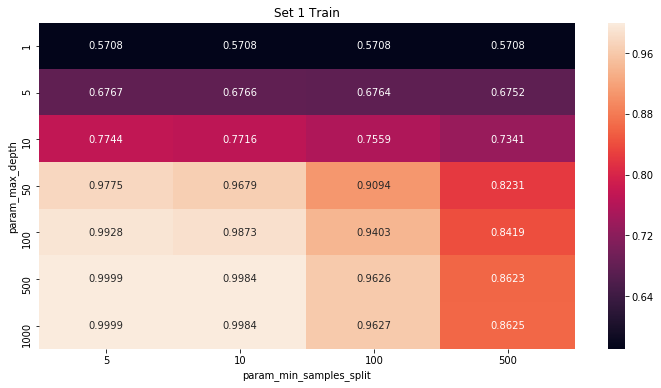

In [126]:
#https://github.com/xoelop/Medium-posts/blob/master/3d%20cross%20validation/ML%206%20-%20Gridsearch%20visulizations%20.ipynb
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (12, 6)
title = 'Set 1 Train'
fmt = 'png'
sns.heatmap(best_scores.mean_train_score, annot=True, fmt='.4g');
plt.title(title);

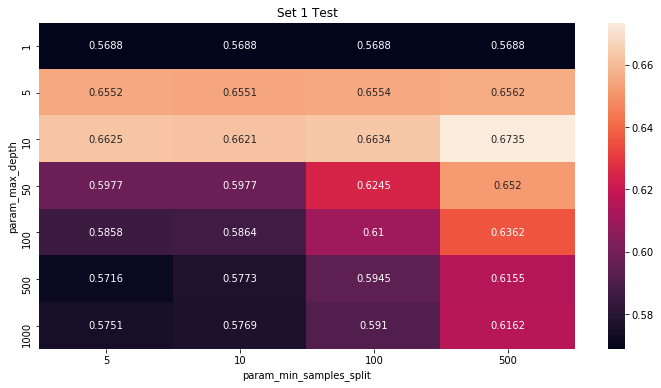

In [127]:
#https://github.com/xoelop/Medium-posts/blob/master/3d%20cross%20validation/ML%206%20-%20Gridsearch%20visulizations%20.ipynb
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (12, 6)
title = 'Set 1 Test'
fmt = 'png'
sns.heatmap(best_scores.mean_test_score, annot=True, fmt='.4g');
plt.title(title);

In [128]:
def batch_predict(clf, data):

    y_data_pred = []
    tr_loop = data.shape[0] - data.shape[0]%1000
# consider you X_tr shape is 49041, then your cr_loop will be 49041 - 49041%1000 = 49000
# in this for loop we will iterate unti the last 1000 multiplier
    for i in range(0, tr_loop, 1000):
        y_data_pred.extend(clf.predict_proba(data[i:i+1000])[:,1])
# we will be predicting for the last data points
    y_data_pred.extend(clf.predict_proba(data[tr_loop:])[:,1])
    
    return y_data_pred

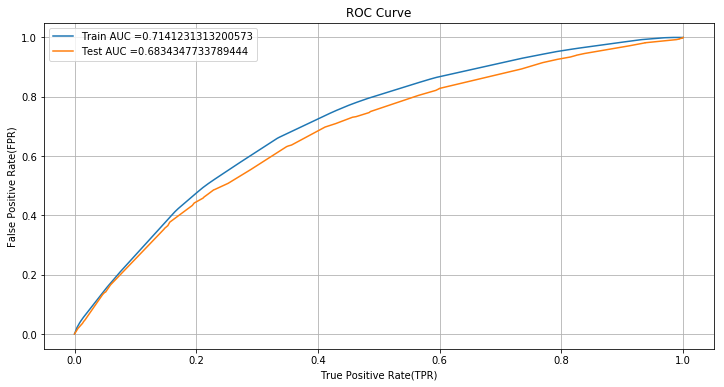

In [129]:
# https://scikitlearn.org/stable/modules/generated/sklearn.metrics.roc_curve.html#sklearn.metrics.roc_curve
#https://scikit-learn.org/stable/modules/svm.html
from sklearn.metrics import roc_curve, auc

parameters = best_params
dt = DecisionTreeClassifier(**parameters)

dt.fit(X_tr_set1, y_train)
# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
# not the predicted outputs
y_train_pred = dt.predict_proba(X_tr_set1)[:,1]
y_test_pred = dt.predict_proba(X_te_set1)[:,1]

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

plt.plot(train_fpr, train_tpr, label="Train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="Test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("True Positive Rate(TPR)")
plt.ylabel("False Positive Rate(FPR)")
plt.title("ROC Curve")
plt.grid(True)
plt.show()

In [130]:
# we are writing our own function for predict, with defined threshold
# we will pick a threshold that will give the least fpr
def predict(proba, threshould, fpr, tpr):
    
    t = threshould[np.argmax(tpr*(1-fpr))]
    
    # (tpr*(1-fpr)) will be maximum if your fpr is very low and tpr is very high
    
    print("the maximum value of tpr*(1-fpr)", max(tpr*(1-fpr)), "for threshold", np.round(t,3))
    predictions = []
    for i in proba:
        if i>=t:
            predictions.append(1)
        else:
            predictions.append(0)
    return predictions

In [131]:
print("="*100)
from sklearn.metrics import confusion_matrix
print("Train confusion matrix")
print(confusion_matrix(y_train, predict(y_train_pred, tr_thresholds, train_fpr, train_tpr)))
print("Test confusion matrix")
print(confusion_matrix(y_test, predict(y_test_pred, tr_thresholds, train_fpr, train_tpr)))

Train confusion matrix
the maximum value of tpr*(1-fpr) 0.44024713024975104 for threshold 0.853
[[ 4921  2505]
 [13968 27647]]
Test confusion matrix
the maximum value of tpr*(1-fpr) 0.44024713024975104 for threshold 0.853
[[ 3513  1946]
 [11100 19493]]


the maximum value of tpr*(1-fpr) 0.44024713024975104 for threshold 0.853


Text(87.0, 0.5, 'Actual Label')

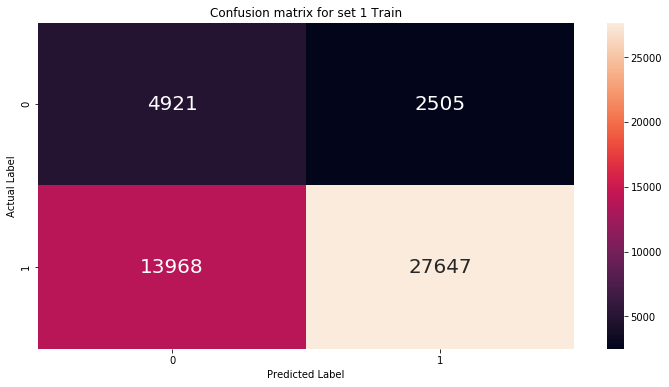

In [132]:
conf_mat_set1_train=pd.DataFrame(confusion_matrix(y_train,predict(y_train_pred,tr_thresholds,
train_fpr,train_tpr)),range(2),range(2))
sns.heatmap(conf_mat_set1_train,annot=True,annot_kws={"size":20},fmt='g')
plt.title('Confusion matrix for set 1 Train')
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")

the maximum value of tpr*(1-fpr) 0.44024713024975104 for threshold 0.853


Text(87.0, 0.5, 'Actual Label')

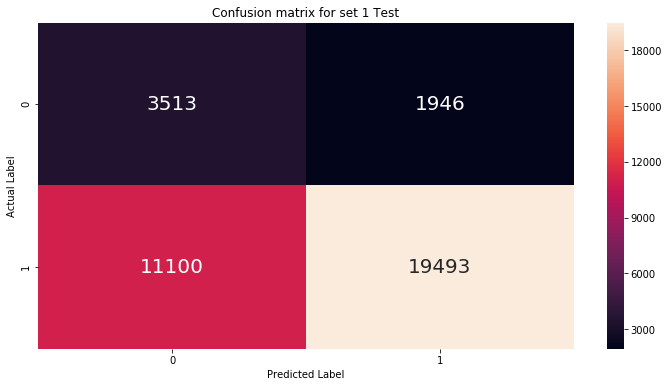

In [133]:
conf_mat_set1_test=pd.DataFrame(confusion_matrix(y_test,predict(y_test_pred,tr_thresholds,
train_fpr,train_tpr)),range(2),range(2))
sns.heatmap(conf_mat_set1_test,annot=True,annot_kws={"size":20},fmt='g')
plt.title('Confusion matrix for set 1 Test')
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")

In [134]:
threshold_value = 0.853

In [135]:
fp_list = []
fp_word_count = 0
w = len(y_test)
for i in tqdm(range(w)):
    if y_test[i] == 0 and y_test_pred[i] >= threshold_value:
            fp_list.append(i)
            fp_word_count = fp_word_count + 1
print(fp_word_count)

100%|██████████| 36052/36052 [00:00<00:00, 1242516.77it/s]

1946


In [136]:
words = []
z = preprocessed_essays_xte
for x in range(0,len(z)):
    for y in fp_list:
        if (x==y):
            words.append(z[x])

In [137]:
words = str(words)

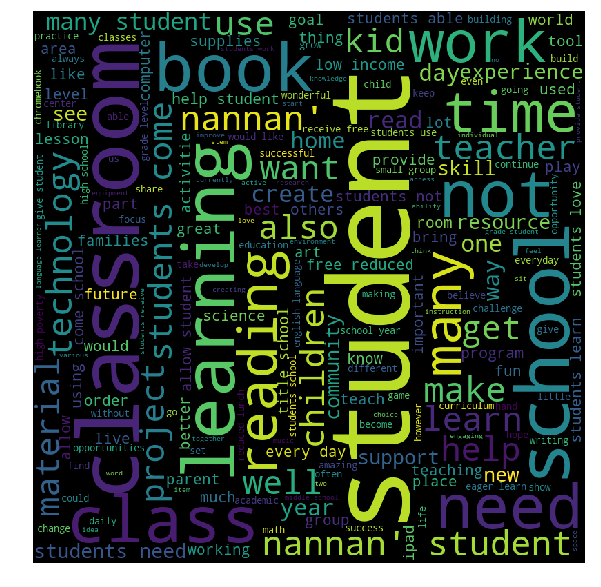

In [138]:
# https://www.geeksforgeeks.org/generating-word-cloud-python/
from wordcloud import WordCloud, STOPWORDS 
import matplotlib.pyplot as plt 
import pandas as pd  
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='black', 
                stopwords = stopwords, 
                min_font_size = 10).generate(words)
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.show() 

### Box Plot for Price 

In [139]:
box_plot_df = pd.DataFrame(X_test['price'])

In [140]:
box_plot_price = box_plot_df.iloc[fp_list,:]

In [141]:
box_plot_price.shape

(1946, 1)

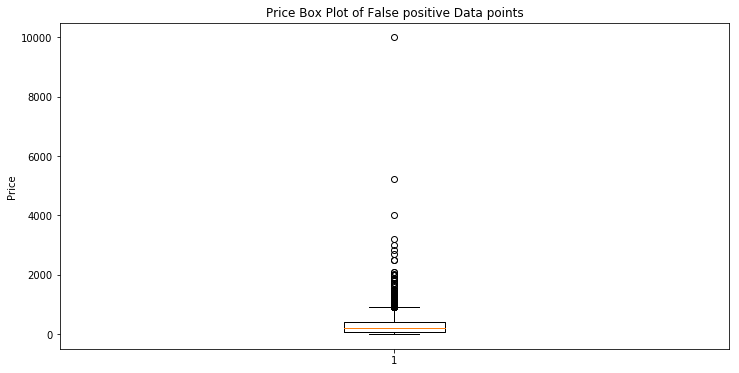

In [142]:
plt.boxplot(box_plot_price.values)
plt.title('Price Box Plot of False positive Data points')
plt.ylabel('Price')
plt.show()

### Observation :-
Most of the false positive points have price range of 0 to 2500.

### PDF of Teacher previously posted projects for False positive Data points 

In [143]:
tpp = pd.DataFrame(X_test['teacher_number_of_previously_posted_projects'])

In [144]:
tpp_pdf = tpp.iloc[fp_list,:]

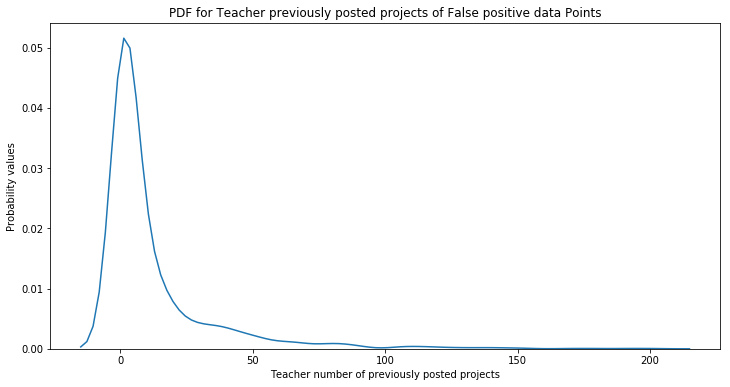

In [145]:
sns.distplot(tpp_pdf.values, hist=False)
plt.xlabel('Teacher number of previously posted projects')
plt.ylabel('Probability values')
plt.title('PDF for Teacher previously posted projects of False positive data Points')
plt.show()

### Observation :-
There's a spike in the false positive values of teacher previously posted projects between the range of 0 to 30 approximately.

#### 2.4.1.1 Graphviz visualization of Decision Tree on BOW,<font color='red'> SET 1</font>

In [146]:
# https://medium.com/@rnbrown/creating-and-visualizing-decision-trees-with-python-f8e8fa394176
from itertools import chain
feature_set = list(chain(ft_state, ft_teacher_prefix, ft_grade, ft_cat, ft_subcat, ft_bow_essay, ft_bow_title, ["Price", "Quantity", "Previously posted Projects"] ))

In [147]:
len(feature_set)

14259

In [148]:
pip install graphviz

  Using cached https://files.pythonhosted.org/packages/17/51/d6de512dbbbab95f0adb53fb2a4396b79722f7c3fbe8ecc2d8c6ab7de00a/graphviz-0.12-py2.py3-none-any.whl
Note: you may need to restart the kernel to use updated packages.


/usr/local/lib/python3.5/dist-packages/sklearn/externals/six.py:31: DeprecationWarning:

The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).



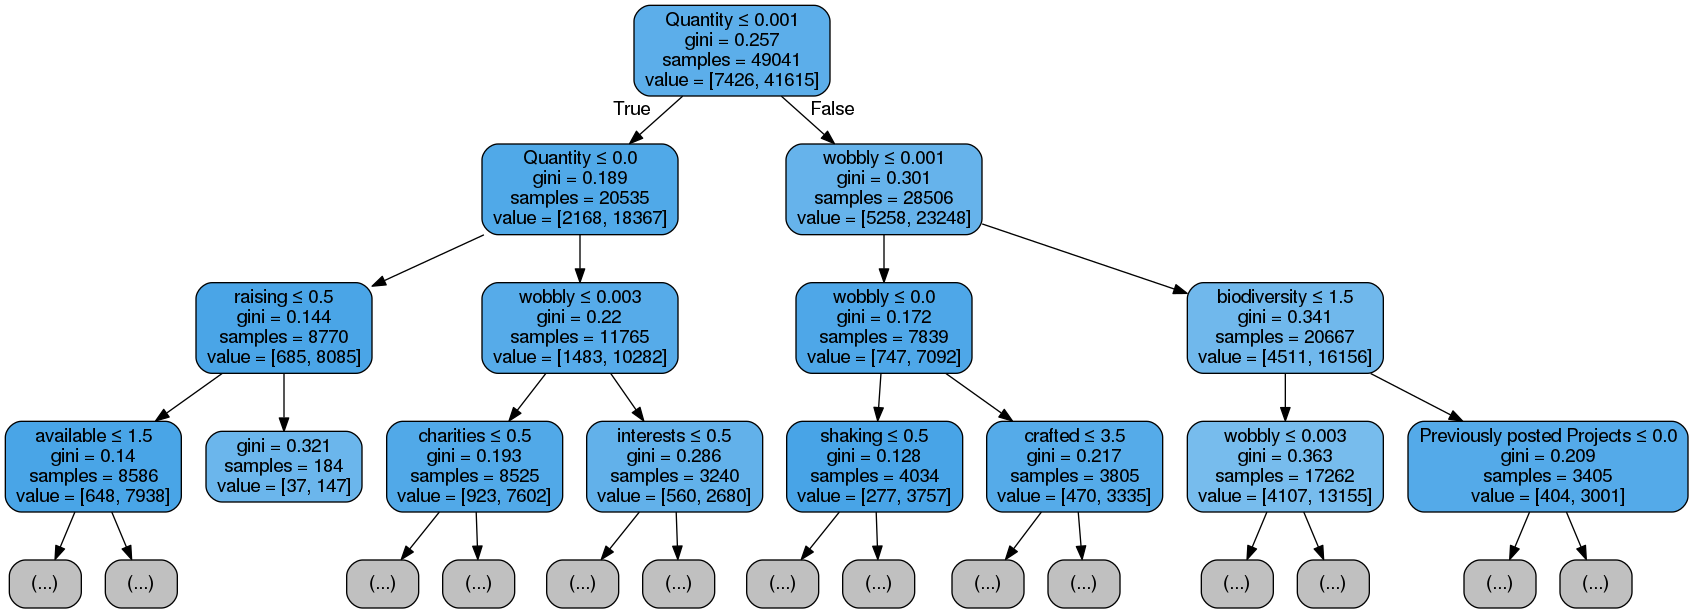

In [149]:
# Please write all the code with proper documentation
# https://medium.com/@rnbrown/creating-and-visualizing-decision-trees-with-python-f8e8fa394176
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

dot_data = StringIO()
export_graphviz(dt, out_file=dot_data,  
                filled=True, max_depth =3, feature_names = feature_set, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

### 2.4.2 Applying Decision Trees on TFIDF,<font color='red'> SET 2</font>

In [150]:
# Please write all the code with proper documentation
# Please write all the code with proper documentation
# merge two sparse matrices: https://stackoverflow.com/a/19710648/4084039
from scipy.sparse import hstack
X_tr_set2 = hstack((X_train_essay_tfidf, X_train_titles_tfidf, X_tr_numcat )).tocsr()
X_cv_set2 = hstack((X_cv_essay_tfidf, X_cv_titles_tfidf, X_cv_numcat)).tocsr()
X_te_set2 = hstack((X_test_essay_tfidf, X_test_titles_tfidf, X_te_numcat )).tocsr()
print("Final Data matrix")
print(X_tr_set2.shape, y_train.shape)
print(X_cv_set2.shape, y_cv.shape)
print(X_te_set2.shape, y_test.shape)
print("="*100)

Final Data matrix
(49041, 14259) (49041,)
(24155, 14259) (24155,)
(36052, 14259) (36052,)


In [151]:
#code source: http://occam.olin.edu/sites/default/files/DataScienceMaterials/machine_learning_lecture_2/Machine%20Learning%20Lecture%202.html
from sklearn.model_selection import learning_curve, GridSearchCV
from sklearn.datasets import *
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
import matplotlib.pyplot as plt

data = data #refer: http://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_breast_cancer.html#sklearn.datasets.load_breast_cancer

#https://scikit-learn.org/stable/modules/grid_search.html
parameters = {'max_depth': [1, 5, 10, 50, 100, 500, 1000], 'min_samples_split':[5, 10, 100, 500]}


clf  = DecisionTreeClassifier(class_weight='balanced')
        
model = GridSearchCV(clf, parameters, cv=5, scoring='roc_auc', return_train_score=True, verbose=10, n_jobs=-1)
model.fit(X_tr_set2, y_train)

train_auc =  model.cv_results_['mean_train_score']
train_auc_std = model.cv_results_['std_train_score']
cv_auc = model.cv_results_['mean_test_score']
cv_auc_std = model.cv_results_['std_test_score']

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    2.5s
[Parallel(n_jobs=-1)]: Done  12 tasks      | elapsed:    3.5s
[Parallel(n_jobs=-1)]: Done  21 tasks      | elapsed:    8.3s
[Parallel(n_jobs=-1)]: Done  30 tasks      | elapsed:    9.1s
[Parallel(n_jobs=-1)]: Done  41 tasks      | elapsed:   27.9s
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:   39.4s
[Parallel(n_jobs=-1)]: Done  65 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done  78 tasks      | elapsed:  2.5min
[Parallel(n_jobs=-1)]: Done  93 tasks      | elapsed:  4.4min
[Parallel(n_jobs=-1)]: Done 108 tasks      | elapsed:  6.2min
[Parallel(n_jobs=-1)]: Done 136 out of 140 | elapsed:  9.6min remaining:   16.9s
[Parallel(n_jobs=-1)]: Done 140 out of 140 | elapsed:  9.7min finished


In [152]:
#Results of grid Search 
best_params = model.best_params_
print(model.best_score_)
print(model.best_params_)

0.6685907005856884
{'min_samples_split': 500, 'max_depth': 10}


In [153]:
#https://github.com/xoelop/Medium-posts/blob/master/3d%20cross%20validation/ML%206%20-%20Gridsearch%20visulizations%20.ipynb
best_scores = results.groupby(['param_max_depth','param_min_samples_split']).max().unstack()[['mean_test_score','mean_train_score']]
print(best_scores)

                        mean_test_score                                \
param_min_samples_split             5         10        100       500   
param_max_depth                                                         
1                              0.568818  0.568818  0.568818  0.568818   
5                              0.655173  0.655054  0.655416  0.656156   
10                             0.662548  0.662108  0.663390  0.673515   
50                             0.597732  0.597677  0.624472  0.652000   
100                            0.585811  0.586438  0.609978  0.636187   
500                            0.571579  0.577253  0.594463  0.615452   
1000                           0.575081  0.576917  0.591030  0.616154   

                        mean_train_score                                
param_min_samples_split              5         10        100       500  
param_max_depth                                                         
1                               0.570781  0.570781

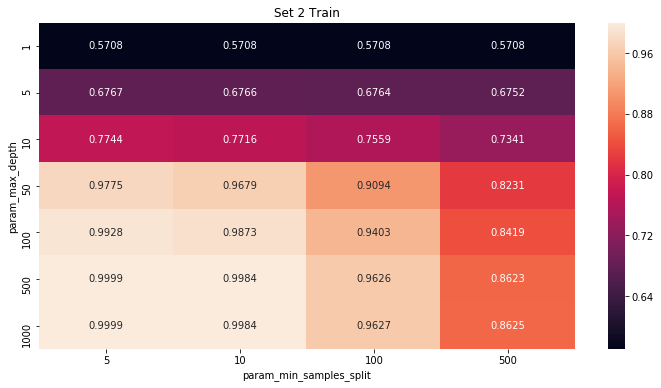

In [154]:
#https://github.com/xoelop/Medium-posts/blob/master/3d%20cross%20validation/ML%206%20-%20Gridsearch%20visulizations%20.ipynb
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (12, 6)
title = 'Set 2 Train'
fmt = 'png'
sns.heatmap(best_scores.mean_train_score, annot=True, fmt='.4g');
plt.title(title);

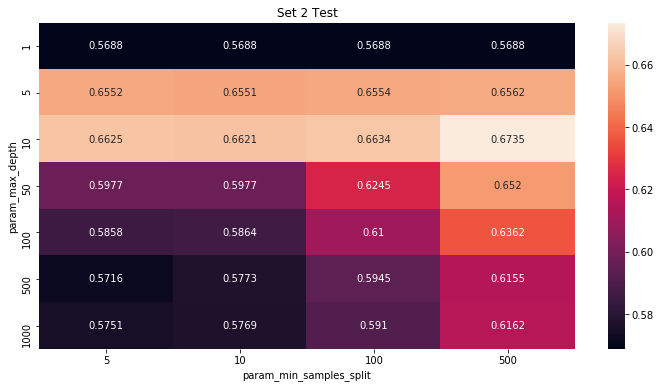

In [155]:
#https://github.com/xoelop/Medium-posts/blob/master/3d%20cross%20validation/ML%206%20-%20Gridsearch%20visulizations%20.ipynb
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (12, 6)
title = 'Set 2 Test'
fmt = 'png'
sns.heatmap(best_scores.mean_test_score, annot=True, fmt='.4g');
plt.title(title);

In [156]:
def batch_predict(clf, data):

    y_data_pred = []
    tr_loop = data.shape[0] - data.shape[0]%1000
# consider you X_tr shape is 49041, then your cr_loop will be 49041 - 49041%1000 = 49000
# in this for loop we will iterate unti the last 1000 multiplier
    for i in range(0, tr_loop, 1000):
        y_data_pred.extend(clf.predict_proba(data[i:i+1000])[:,1])
# we will be predicting for the last data points
    y_data_pred.extend(clf.predict_proba(data[tr_loop:])[:,1])
    
    return y_data_pred

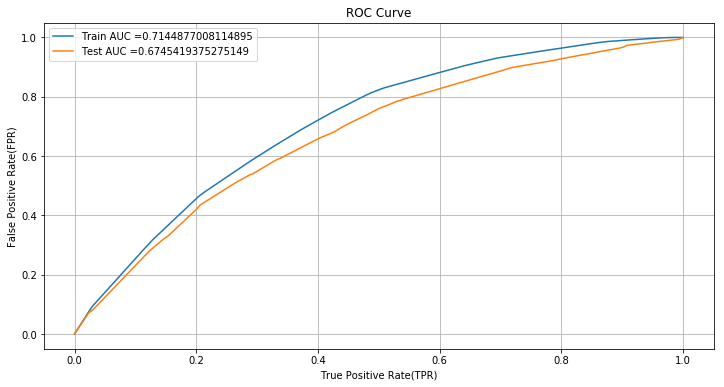

In [157]:
# https://scikitlearn.org/stable/modules/generated/sklearn.metrics.roc_curve.html#sklearn.metrics.roc_curve
#https://scikit-learn.org/stable/modules/svm.html
from sklearn.metrics import roc_curve, auc

parameters = best_params
dt = DecisionTreeClassifier(**parameters)

dt.fit(X_tr_set2, y_train)
# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
# not the predicted outputs
y_train_pred = dt.predict_proba(X_tr_set2)[:,1]
y_test_pred = dt.predict_proba(X_te_set2)[:,1]

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

plt.plot(train_fpr, train_tpr, label="Train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="Test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("True Positive Rate(TPR)")
plt.ylabel("False Positive Rate(FPR)")
plt.title("ROC Curve")
plt.grid(True)
plt.show()

In [158]:

# we are writing our own function for predict, with defined threshold
# we will pick a threshold that will give the least fpr
def predict(proba, threshould, fpr, tpr):
    
    t = threshould[np.argmax(tpr*(1-fpr))]
    
    # (tpr*(1-fpr)) will be maximum if your fpr is very low and tpr is very high
    
    print("the maximum value of tpr*(1-fpr)", max(tpr*(1-fpr)), "for threshold", np.round(t,3))
    predictions = []
    for i in proba:
        if i>=t:
            predictions.append(1)
        else:
            predictions.append(0)
    return predictions

In [159]:
print("="*100)
from sklearn.metrics import confusion_matrix
print("Train confusion matrix")
print(confusion_matrix(y_train, predict(y_train_pred, tr_thresholds, train_fpr, train_tpr)))
print("Test confusion matrix")
print(confusion_matrix(y_test, predict(y_test_pred, tr_thresholds, train_fpr, train_tpr)))

Train confusion matrix
the maximum value of tpr*(1-fpr) 0.4327056959193904 for threshold 0.866
[[ 4473  2953]
 [11720 29895]]
Test confusion matrix
the maximum value of tpr*(1-fpr) 0.4327056959193904 for threshold 0.866
[[ 3132  2327]
 [ 9757 20836]]


the maximum value of tpr*(1-fpr) 0.4327056959193904 for threshold 0.866


Text(87.0, 0.5, 'Actual Label')

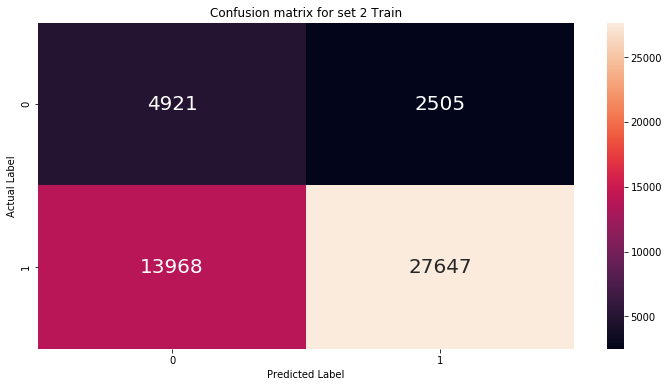

In [160]:
conf_mat_set2_train=pd.DataFrame(confusion_matrix(y_train,predict(y_train_pred,tr_thresholds,
train_fpr,train_tpr)),range(2),range(2))
sns.heatmap(conf_mat_set1_train,annot=True,annot_kws={"size":20},fmt='g')
plt.title('Confusion matrix for set 2 Train')
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")

the maximum value of tpr*(1-fpr) 0.4327056959193904 for threshold 0.866


Text(87.0, 0.5, 'Actual Label')

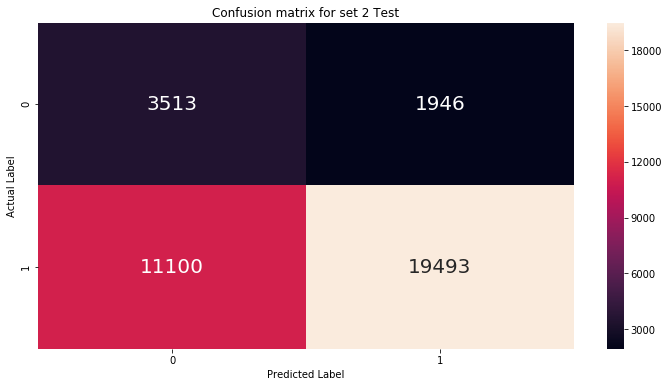

In [161]:
conf_mat_set2_test=pd.DataFrame(confusion_matrix(y_test,predict(y_test_pred,tr_thresholds,
train_fpr,train_tpr)),range(2),range(2))
sns.heatmap(conf_mat_set1_test,annot=True,annot_kws={"size":20},fmt='g')
plt.title('Confusion matrix for set 2 Test')
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")

In [162]:
threshold_value = 0.866
fp_list = []
fp_word_count = 0
w = len(y_test)
for i in tqdm(range(w)):
    if y_test[i] == 0 and y_test_pred[i] >= threshold_value:
            fp_list.append(i)
            fp_word_count = fp_word_count + 1
print(fp_word_count)

100%|██████████| 36052/36052 [00:00<00:00, 1288542.57it/s]

2327


In [163]:
words = []
z = preprocessed_essays_xte
for x in range(0,len(z)):
    for y in fp_list:
        if (x==y):
            words.append(z[x])

In [164]:
words = str(words)

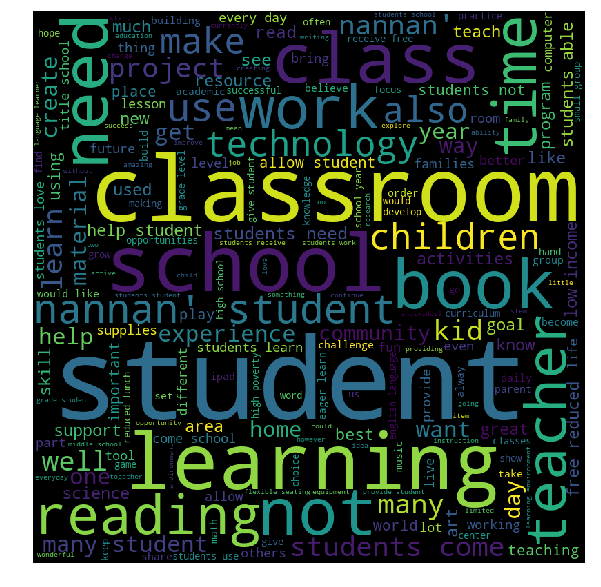

In [165]:
# https://www.geeksforgeeks.org/generating-word-cloud-python/
from wordcloud import WordCloud, STOPWORDS 
import matplotlib.pyplot as plt 
import pandas as pd  
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='black', 
                stopwords = stopwords, 
                min_font_size = 10).generate(words)
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.show() 

### Box Plot for Price

In [166]:
box_plot_df = pd.DataFrame(X_test['price'])
box_plot_price = box_plot_df.iloc[fp_list,:]
box_plot_price.shape

(2327, 1)

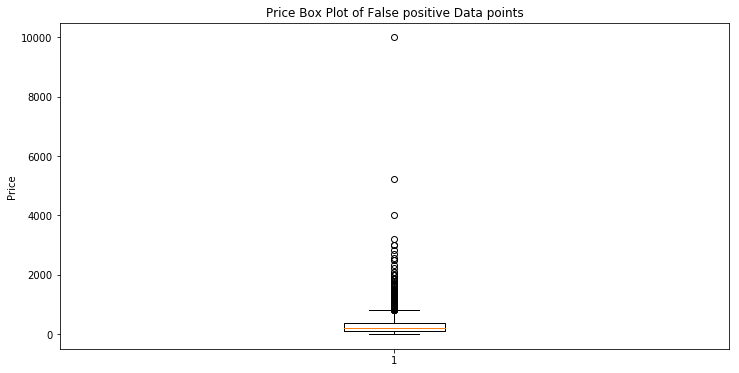

In [167]:
plt.boxplot(box_plot_price.values)
plt.title('Price Box Plot of False positive Data points')
plt.ylabel('Price')
plt.show()

### Observation :-
Most of the false positive points have price range of 0 to 2500.

### PDF of Teacher previously posted projects for False positive Data points 

In [168]:
tpp = pd.DataFrame(X_test['teacher_number_of_previously_posted_projects'])

In [169]:
tpp_pdf = tpp.iloc[fp_list,:]

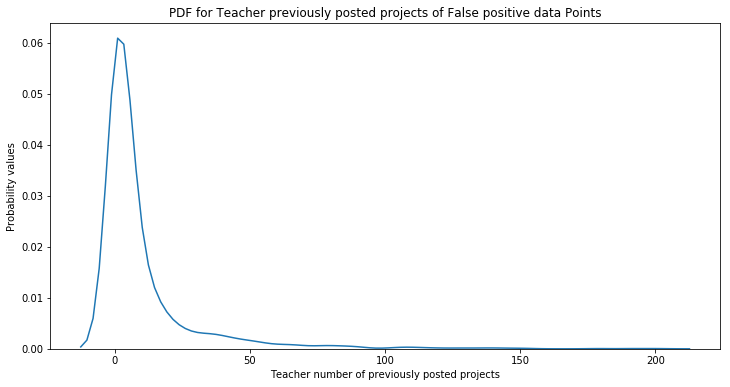

In [170]:
sns.distplot(tpp_pdf.values, hist=False)
plt.xlabel('Teacher number of previously posted projects')
plt.ylabel('Probability values')
plt.title('PDF for Teacher previously posted projects of False positive data Points')
plt.show()

### Observation :-
There's a spike in the false positive values of teacher previously posted projects between the range of 0 to 30 approximately.

#### 2.4.2.1 Graphviz visualization of Decision Tree on TFIDF,<font color='red'> SET 2</font>

In [172]:
# Please write all the code with proper documentation
# https://medium.com/@rnbrown/creating-and-visualizing-decision-trees-with-python-f8e8fa394176
feature_set_tfidf = list(chain(ft_state, ft_teacher_prefix, ft_grade, ft_cat, ft_subcat, ft_tfidf_essay, ft_tfidf_title, ["Price", "Quantity", "Previously posted Projects"]))

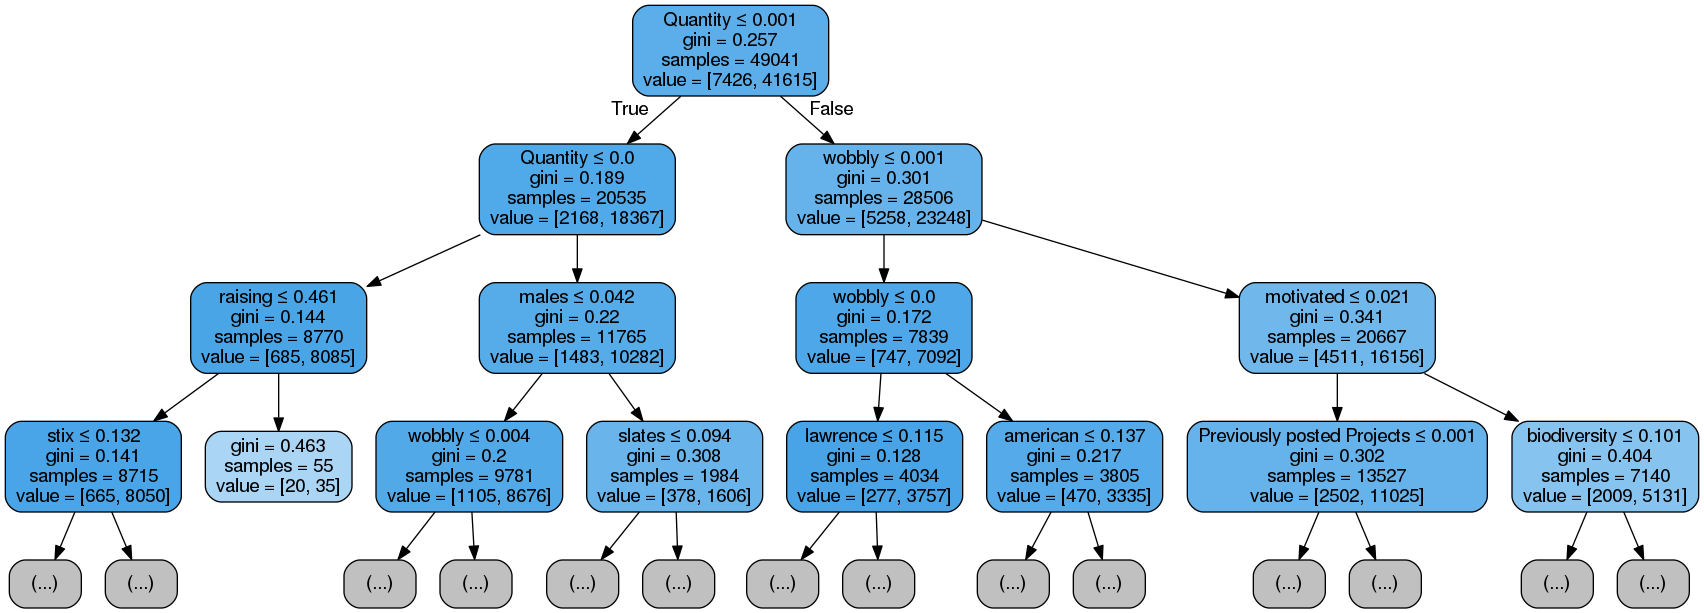

In [173]:
# Please write all the code with proper documentation
# https://medium.com/@rnbrown/creating-and-visualizing-decision-trees-with-python-f8e8fa394176
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

dot_data = StringIO()
export_graphviz(dt, out_file=dot_data,  
                filled=True, max_depth =3, feature_names = feature_set, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

### 2.4.3 Applying Decision Trees on AVG W2V,<font color='red'> SET 3</font>

In [246]:
# Please write all the code with proper documentation
# merge two sparse matrices: https://stackoverflow.com/a/19710648/4084039
from scipy.sparse import hstack
X_tr_set3 = hstack((avg_w2v_vectors_extr, avg_w2v_vectors_txtr, X_tr_numcat)).tocsr()
X_cv_set3 = hstack((avg_w2v_vectors_excv, avg_w2v_vectors_txcv, X_cv_numcat)).tocsr()
X_te_set3 = hstack((avg_w2v_vectors_exte, avg_w2v_vectors_txte, X_te_numcat )).tocsr()
print("Final Data matrix")
print(X_tr_set3.shape, y_train.shape)
print(X_cv_set3.shape, y_cv.shape)
print(X_te_set3.shape, y_test.shape)
print("="*100)

Final Data matrix
(49041, 702) (49041,)
(24155, 702) (24155,)
(36052, 702) (36052,)


In [247]:
#code source: http://occam.olin.edu/sites/default/files/DataScienceMaterials/machine_learning_lecture_2/Machine%20Learning%20Lecture%202.html
from sklearn.model_selection import learning_curve, GridSearchCV
from sklearn.datasets import *
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
import matplotlib.pyplot as plt

data = data #refer: http://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_breast_cancer.html#sklearn.datasets.load_breast_cancer

#https://scikit-learn.org/stable/modules/grid_search.html
parameters = {'max_depth': [1, 5, 10, 50, 100, 500, 1000], 'min_samples_split':[5, 10, 100, 500]}


clf  = DecisionTreeClassifier(class_weight='balanced')
        
model = GridSearchCV(clf, parameters, cv=5, scoring='roc_auc', return_train_score=True, verbose=10, n_jobs=-1)
model.fit(X_tr_set3, y_train)

train_auc =  model.cv_results_['mean_train_score']
train_auc_std = model.cv_results_['std_train_score']
cv_auc = model.cv_results_['mean_test_score']
cv_auc_std = model.cv_results_['std_test_score']

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    9.6s
[Parallel(n_jobs=-1)]: Done  12 tasks      | elapsed:   16.2s
[Parallel(n_jobs=-1)]: Done  21 tasks      | elapsed:   45.8s
[Parallel(n_jobs=-1)]: Done  30 tasks      | elapsed:   46.7s
[Parallel(n_jobs=-1)]: Done  41 tasks      | elapsed:  2.6min
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:  3.7min
[Parallel(n_jobs=-1)]: Done  65 tasks      | elapsed:  7.0min
[Parallel(n_jobs=-1)]: Done  78 tasks      | elapsed:  9.8min
[Parallel(n_jobs=-1)]: Done  93 tasks      | elapsed: 14.6min
[Parallel(n_jobs=-1)]: Done 108 tasks      | elapsed: 18.7min
[Parallel(n_jobs=-1)]: Done 136 out of 140 | elapsed: 26.5min remaining:   46.7s
[Parallel(n_jobs=-1)]: Done 140 out of 140 | elapsed: 26.8min finished


In [248]:
#Results of grid Search 
best_params = model.best_params_
print(model.best_score_)
print(model.best_params_)

0.6573717978233258
{'min_samples_split': 500, 'max_depth': 5}


In [249]:
#https://github.com/xoelop/Medium-posts/blob/master/3d%20cross%20validation/ML%206%20-%20Gridsearch%20visulizations%20.ipynb
best_scores = results.groupby(['param_max_depth','param_min_samples_split']).max().unstack()[['mean_test_score','mean_train_score']]
print(best_scores)

                        mean_test_score                                \
param_min_samples_split             5         10        100       500   
param_max_depth                                                         
1                              0.568818  0.568818  0.568818  0.568818   
5                              0.655173  0.655054  0.655416  0.656156   
10                             0.662548  0.662108  0.663390  0.673515   
50                             0.597732  0.597677  0.624472  0.652000   
100                            0.585811  0.586438  0.609978  0.636187   
500                            0.571579  0.577253  0.594463  0.615452   
1000                           0.575081  0.576917  0.591030  0.616154   

                        mean_train_score                                
param_min_samples_split              5         10        100       500  
param_max_depth                                                         
1                               0.570781  0.570781

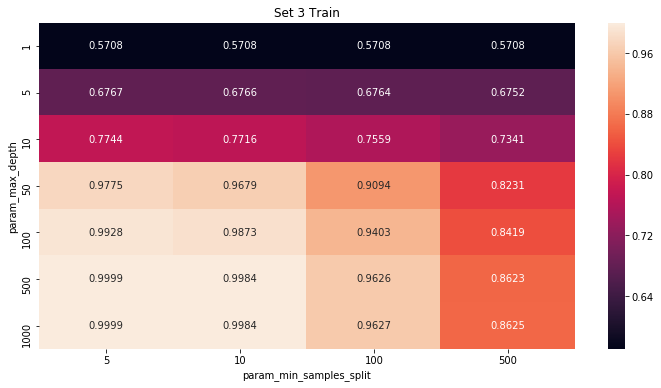

In [250]:
#https://github.com/xoelop/Medium-posts/blob/master/3d%20cross%20validation/ML%206%20-%20Gridsearch%20visulizations%20.ipynb
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (12, 6)
title = 'Set 3 Train'
fmt = 'png'
sns.heatmap(best_scores.mean_train_score, annot=True, fmt='.4g');
plt.title(title);

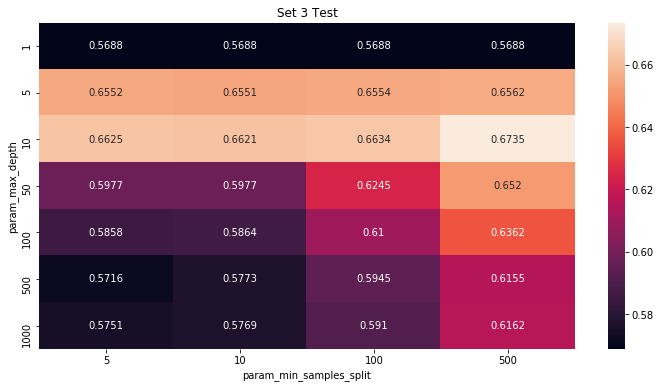

In [251]:
#https://github.com/xoelop/Medium-posts/blob/master/3d%20cross%20validation/ML%206%20-%20Gridsearch%20visulizations%20.ipynb
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (12, 6)
title = 'Set 3 Test'
fmt = 'png'
sns.heatmap(best_scores.mean_test_score, annot=True, fmt='.4g');
plt.title(title);

In [252]:
def batch_predict(clf, data):

    y_data_pred = []
    tr_loop = data.shape[0] - data.shape[0]%1000
# consider you X_tr shape is 49041, then your cr_loop will be 49041 - 49041%1000 = 49000
# in this for loop we will iterate unti the last 1000 multiplier
    for i in range(0, tr_loop, 1000):
        y_data_pred.extend(clf.predict_proba(data[i:i+1000])[:,1])
# we will be predicting for the last data points
    y_data_pred.extend(clf.predict_proba(data[tr_loop:])[:,1])
    
    return y_data_pred

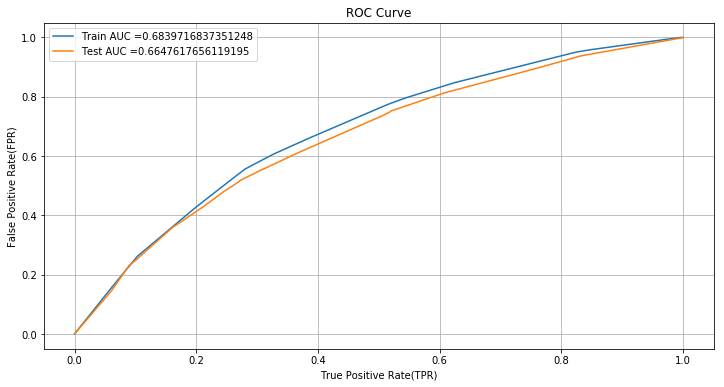

In [253]:
# https://scikitlearn.org/stable/modules/generated/sklearn.metrics.roc_curve.html#sklearn.metrics.roc_curve
#https://scikit-learn.org/stable/modules/svm.html
from sklearn.metrics import roc_curve, auc

parameters = best_params
dt = DecisionTreeClassifier(**parameters)

dt.fit(X_tr_set3, y_train)
# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
# not the predicted outputs
y_train_pred = dt.predict_proba(X_tr_set3)[:,1]
y_test_pred = dt.predict_proba(X_te_set3)[:,1]

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

plt.plot(train_fpr, train_tpr, label="Train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="Test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("True Positive Rate(TPR)")
plt.ylabel("False Positive Rate(FPR)")
plt.title("ROC Curve")
plt.grid(True)
plt.show()

In [254]:
# we are writing our own function for predict, with defined threshold
# we will pick a threshold that will give the least fpr
def predict(proba, threshould, fpr, tpr):
    
    t = threshould[np.argmax(tpr*(1-fpr))]
    
    # (tpr*(1-fpr)) will be maximum if your fpr is very low and tpr is very high
    
    print("the maximum value of tpr*(1-fpr)", max(tpr*(1-fpr)), "for threshold", np.round(t,3))
    predictions = []
    for i in proba:
        if i>=t:
            predictions.append(1)
        else:
            predictions.append(0)
    return predictions

In [255]:
print("="*100)
from sklearn.metrics import confusion_matrix
print("Train confusion matrix")
print(confusion_matrix(y_train, predict(y_train_pred, tr_thresholds, train_fpr, train_tpr)))
print("Test confusion matrix")
print(confusion_matrix(y_test, predict(y_test_pred, tr_thresholds, train_fpr, train_tpr)))

Train confusion matrix
the maximum value of tpr*(1-fpr) 0.40821093243151807 for threshold 0.857
[[ 5003  2423]
 [16400 25215]]
Test confusion matrix
the maximum value of tpr*(1-fpr) 0.40821093243151807 for threshold 0.857
[[ 3802  1657]
 [13771 16822]]


the maximum value of tpr*(1-fpr) 0.40821093243151807 for threshold 0.857


Text(87.0, 0.5, 'Actual Label')

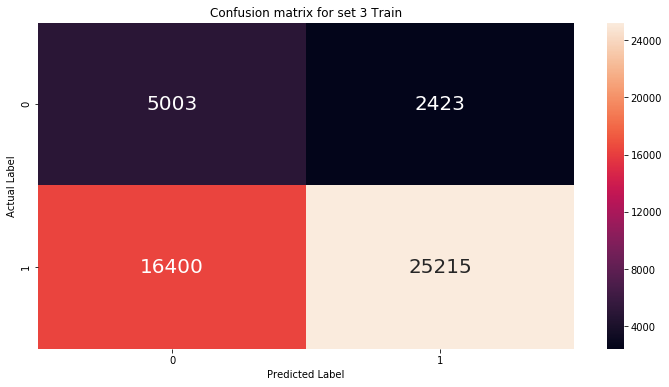

In [256]:
conf_mat_set1_train=pd.DataFrame(confusion_matrix(y_train,predict(y_train_pred,tr_thresholds,
train_fpr,train_tpr)),range(2),range(2))
sns.heatmap(conf_mat_set1_train,annot=True,annot_kws={"size":20},fmt='g')
plt.title('Confusion matrix for set 3 Train')
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")

the maximum value of tpr*(1-fpr) 0.40821093243151807 for threshold 0.857


Text(87.0, 0.5, 'Actual Label')

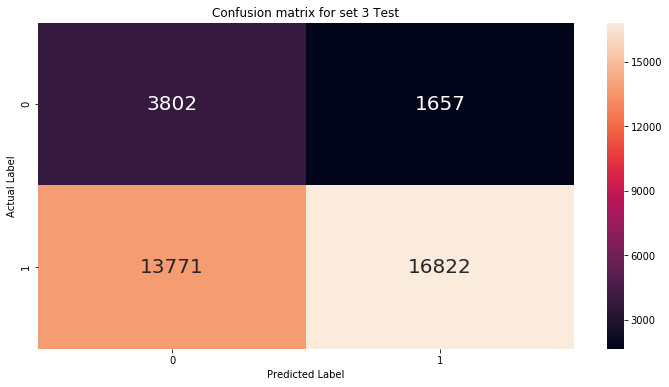

In [257]:
conf_mat_set1_test=pd.DataFrame(confusion_matrix(y_test,predict(y_test_pred,tr_thresholds,
train_fpr,train_tpr)),range(2),range(2))
sns.heatmap(conf_mat_set1_test,annot=True,annot_kws={"size":20},fmt='g')
plt.title('Confusion matrix for set 3 Test')
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")

### 2.4.4 Applying Decision Trees on TFIDF W2V,<font color='red'> SET 4</font>

In [268]:
# Please write all the code with proper documentation
# Please write all the code with proper documentation
# merge two sparse matrices: https://stackoverflow.com/a/19710648/4084039
from scipy.sparse import hstack
X_tr_set4 = hstack((tfidf_w2v_vectors_extr, tfidf_w2v_vectors_txtr, X_tr_numcat)).tocsr()
X_cv_set4 = hstack((tfidf_w2v_vectors_excv, tfidf_w2v_vectors_txcv, X_cv_numcat)).tocsr()
X_te_set4 = hstack((tfidf_w2v_vectors_exte, tfidf_w2v_vectors_txte, X_te_numcat)).tocsr()
print("Final Data matrix")
print(X_tr_set4.shape, y_train.shape)
print(X_cv_set4.shape, y_cv.shape)
print(X_te_set4.shape, y_test.shape)
print("="*100)

Final Data matrix
(49041, 702) (49041,)
(24155, 702) (24155,)
(36052, 702) (36052,)


In [269]:
#code source: http://occam.olin.edu/sites/default/files/DataScienceMaterials/machine_learning_lecture_2/Machine%20Learning%20Lecture%202.html
from sklearn.model_selection import learning_curve, GridSearchCV
from sklearn.datasets import *
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
import matplotlib.pyplot as plt

data = data #refer: http://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_breast_cancer.html#sklearn.datasets.load_breast_cancer
#https://scikit-learn.org/stable/modules/grid_search.html
parameters = {'max_depth': [1, 5, 10, 50, 100, 500, 1000], 'min_samples_split':[5, 10, 100, 500]}


clf  = DecisionTreeClassifier(class_weight='balanced')
        
model = GridSearchCV(clf, parameters, cv=5, scoring='roc_auc', return_train_score=True, verbose=10, n_jobs=-1)
model.fit(X_tr_set4, y_train)

train_auc =  model.cv_results_['mean_train_score']
train_auc_std = model.cv_results_['std_train_score']
cv_auc = model.cv_results_['mean_test_score']
cv_auc_std = model.cv_results_['std_test_score']

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    7.0s
[Parallel(n_jobs=-1)]: Done  12 tasks      | elapsed:   13.8s
[Parallel(n_jobs=-1)]: Done  21 tasks      | elapsed:   44.0s
[Parallel(n_jobs=-1)]: Done  30 tasks      | elapsed:   44.6s
[Parallel(n_jobs=-1)]: Done  41 tasks      | elapsed:  2.6min
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:  3.7min
[Parallel(n_jobs=-1)]: Done  65 tasks      | elapsed:  6.9min
[Parallel(n_jobs=-1)]: Done  78 tasks      | elapsed:  9.5min
[Parallel(n_jobs=-1)]: Done  93 tasks      | elapsed: 14.0min
[Parallel(n_jobs=-1)]: Done 108 tasks      | elapsed: 17.5min
[Parallel(n_jobs=-1)]: Done 136 out of 140 | elapsed: 24.7min remaining:   43.5s
[Parallel(n_jobs=-1)]: Done 140 out of 140 | elapsed: 25.0min finished


In [270]:
#Results of grid Search 
best_params = model.best_params_
print(model.best_score_)
print(model.best_params_)

0.6576610154174987
{'min_samples_split': 500, 'max_depth': 5}


In [271]:
#https://github.com/xoelop/Medium-posts/blob/master/3d%20cross%20validation/ML%206%20-%20Gridsearch%20visulizations%20.ipynb
best_scores = results.groupby(['param_max_depth','param_min_samples_split']).max().unstack()[['mean_test_score','mean_train_score']]
print(best_scores)


                        mean_test_score                                \
param_min_samples_split             5         10        100       500   
param_max_depth                                                         
1                              0.568818  0.568818  0.568818  0.568818   
5                              0.655173  0.655054  0.655416  0.656156   
10                             0.662548  0.662108  0.663390  0.673515   
50                             0.597732  0.597677  0.624472  0.652000   
100                            0.585811  0.586438  0.609978  0.636187   
500                            0.571579  0.577253  0.594463  0.615452   
1000                           0.575081  0.576917  0.591030  0.616154   

                        mean_train_score                                
param_min_samples_split              5         10        100       500  
param_max_depth                                                         
1                               0.570781  0.570781

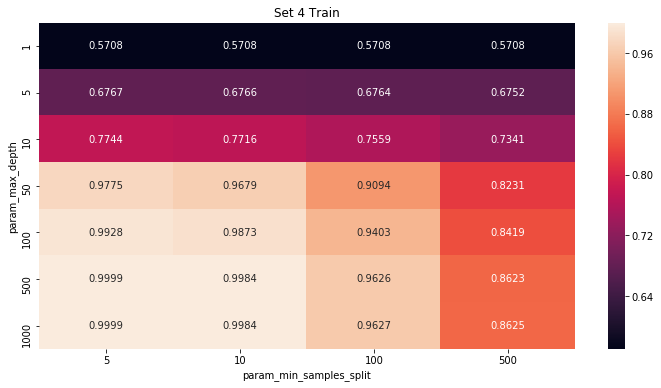

In [272]:
#https://github.com/xoelop/Medium-posts/blob/master/3d%20cross%20validation/ML%206%20-%20Gridsearch%20visulizations%20.ipynb
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (12, 6)
title = 'Set 4 Train'
fmt = 'png'
sns.heatmap(best_scores.mean_train_score, annot=True, fmt='.4g');
plt.title(title);

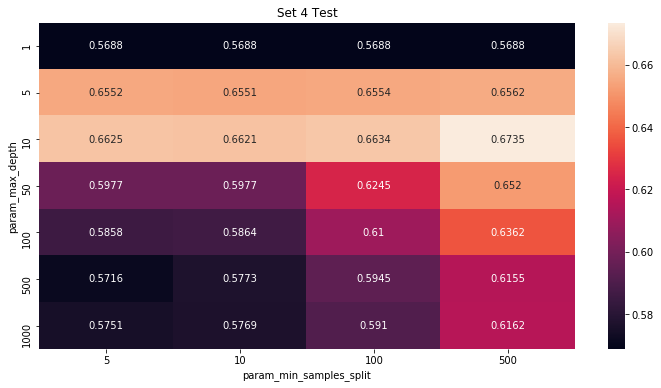

In [273]:
#https://github.com/xoelop/Medium-posts/blob/master/3d%20cross%20validation/ML%206%20-%20Gridsearch%20visulizations%20.ipynb
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (12, 6)
title = 'Set 4 Test'
fmt = 'png'
sns.heatmap(best_scores.mean_test_score, annot=True, fmt='.4g');
plt.title(title);

In [274]:
def batch_predict(clf, data):

    y_data_pred = []
    tr_loop = data.shape[0] - data.shape[0]%1000
# consider you X_tr shape is 49041, then your cr_loop will be 49041 - 49041%1000 = 49000
# in this for loop we will iterate unti the last 1000 multiplier
    for i in range(0, tr_loop, 1000):
        y_data_pred.extend(clf.predict_proba(data[i:i+1000])[:,1])
# we will be predicting for the last data points
    y_data_pred.extend(clf.predict_proba(data[tr_loop:])[:,1])
    
    return y_data_pred

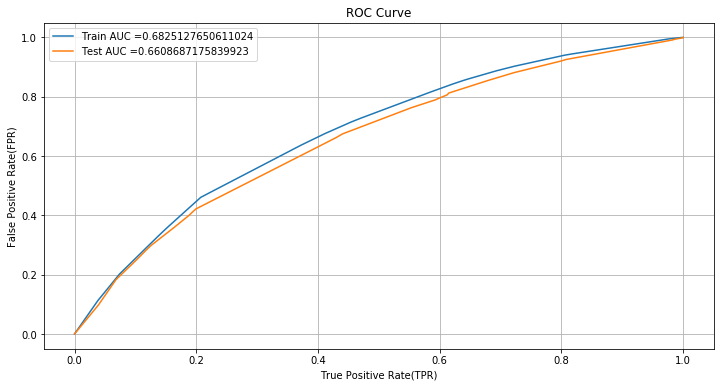

In [275]:
# https://scikitlearn.org/stable/modules/generated/sklearn.metrics.roc_curve.html#sklearn.metrics.roc_curve
#https://scikit-learn.org/stable/modules/svm.html
from sklearn.metrics import roc_curve, auc

parameters = best_params
dt = DecisionTreeClassifier(**parameters)

dt.fit(X_tr_set4, y_train)
# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
# not the predicted outputs
y_train_pred = dt.predict_proba(X_tr_set4)[:,1]
y_test_pred = dt.predict_proba(X_te_set4)[:,1]

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

plt.plot(train_fpr, train_tpr, label="Train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="Test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("True Positive Rate(TPR)")
plt.ylabel("False Positive Rate(FPR)")
plt.title("ROC Curve")
plt.grid(True)
plt.show()

In [276]:
# we are writing our own function for predict, with defined threshold
# we will pick a threshold that will give the least fpr
def predict(proba, threshould, fpr, tpr):
    
    t = threshould[np.argmax(tpr*(1-fpr))]
    
    # (tpr*(1-fpr)) will be maximum if your fpr is very low and tpr is very high
    
    print("the maximum value of tpr*(1-fpr)", max(tpr*(1-fpr)), "for threshold", np.round(t,3))
    predictions = []
    for i in proba:
        if i>=t:
            predictions.append(1)
        else:
            predictions.append(0)
    return predictions

In [277]:
print("="*100)
from sklearn.metrics import confusion_matrix
print("Train confusion matrix")
print(confusion_matrix(y_train, predict(y_train_pred, tr_thresholds, train_fpr, train_tpr)))
print("Test confusion matrix")
print(confusion_matrix(y_test, predict(y_test_pred, tr_thresholds, train_fpr, train_tpr)))

Train confusion matrix
the maximum value of tpr*(1-fpr) 0.39981246015190813 for threshold 0.857
[[ 4660  2766]
 [15101 26514]]
Test confusion matrix
the maximum value of tpr*(1-fpr) 0.39981246015190813 for threshold 0.857
[[ 3439  2020]
 [12242 18351]]


the maximum value of tpr*(1-fpr) 0.39981246015190813 for threshold 0.857


Text(87.0, 0.5, 'Actual Label')

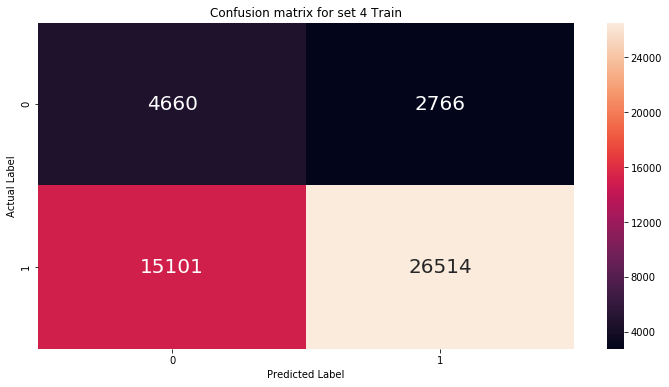

In [278]:
conf_mat_set1_train=pd.DataFrame(confusion_matrix(y_train,predict(y_train_pred,tr_thresholds,
train_fpr,train_tpr)),range(2),range(2))
sns.heatmap(conf_mat_set1_train,annot=True,annot_kws={"size":20},fmt='g')
plt.title('Confusion matrix for set 4 Train')
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")

the maximum value of tpr*(1-fpr) 0.39981246015190813 for threshold 0.857


Text(87.0, 0.5, 'Actual Label')

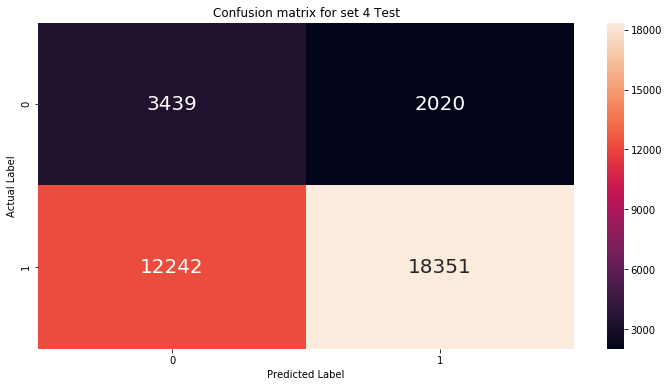

In [279]:
conf_mat_set1_test=pd.DataFrame(confusion_matrix(y_test,predict(y_test_pred,tr_thresholds,
train_fpr,train_tpr)),range(2),range(2))
sns.heatmap(conf_mat_set1_test,annot=True,annot_kws={"size":20},fmt='g')
plt.title('Confusion matrix for set 4 Test')
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")

<h2>2.5 [Task-2]Getting top 5k features using `feature_importances_`</h2>

In [291]:
# please write all the code with proper documentation, and proper titles for each subsection
# go through documentations and blogs before you start coding
# first figure out what to do, and then think about how to do.
# reading and understanding error messages will be very much helpfull in debugging your code
# when you plot any graph make sure you use 
    # a. Title, that describes your plot, this will be very helpful to the reader
    # b. Legends if needed
    # c. X-axis label
    # d. Y-axis label
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(max_depth = 10)

In [292]:
model = dt.fit(X_tr_set2, y_train)

In [293]:
ft_imp = dt.feature_importances_

In [294]:
# Removing features which have 0 importance 
ft_imp = list(ft_imp)
final_ft_imp = []
for z in range(len(ft_imp)):
    if ft_imp[z] > 0:
        final_ft_imp.append(z)
print(len(final_ft_imp))

185


In [295]:
print(final_ft_imp)

[17, 89, 162, 241, 343, 559, 571, 572, 653, 701, 723, 734, 815, 916, 1037, 1070, 1140, 1149, 1246, 1330, 1504, 1598, 1805, 1810, 1913, 1949, 1973, 1995, 2008, 2153, 2155, 2163, 2177, 2187, 2524, 2575, 2708, 2711, 2809, 3034, 3091, 3452, 3482, 3729, 3746, 3749, 3810, 3914, 3923, 4040, 4084, 4175, 4207, 4401, 4494, 4512, 4547, 4570, 4605, 4610, 4744, 4760, 4793, 4795, 4811, 4842, 4892, 5008, 5015, 5125, 5154, 5216, 5251, 5284, 5409, 5457, 5470, 5673, 5748, 5858, 6109, 6142, 6216, 6220, 6285, 6291, 6363, 6390, 6419, 6451, 6495, 6584, 6600, 6627, 6641, 6683, 6806, 6903, 6917, 6981, 7011, 7087, 7133, 7188, 7220, 7254, 7411, 7501, 7643, 7678, 7703, 7822, 7985, 8167, 8215, 8289, 8383, 8417, 8540, 8564, 8621, 8680, 8687, 8751, 9144, 9284, 9437, 9559, 9604, 9778, 9831, 9847, 9880, 9942, 9989, 10080, 10081, 10397, 10400, 10415, 10470, 10537, 10540, 10546, 10634, 10640, 10656, 10740, 10852, 10853, 10892, 10968, 10995, 11194, 11276, 11315, 11439, 11442, 11457, 11532, 11582, 11628, 11634, 11690, 11

#### Selecting all the datapoints having the above important features from set 2

In [296]:
p = pd.DataFrame(X_tr_set2.todense())

In [297]:
X_tr_set2_fts = p.iloc[:,final_ft_imp]

In [298]:
print(X_tr_set2_fts.shape)

(49041, 185)


In [299]:
#xtr_ft_imp = pd.DataFrame(final_ft_imp.todense())

### Selecting best Feature from the test set as well

In [300]:
q = pd.DataFrame(X_te_set2.todense())

In [301]:
xte_ft_imp = q.iloc[:,final_ft_imp]

In [302]:
print(xte_ft_imp.shape)

(36052, 185)


## Using Logistic Regression for modelling with top 5k Featuers 

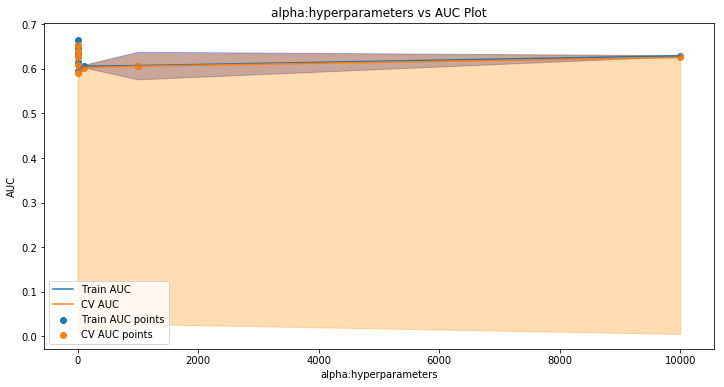

In [303]:
#code source: http://occam.olin.edu/sites/default/files/DataScienceMaterials/machine_learning_lecture_2/Ma
from sklearn.model_selection import learning_curve, GridSearchCV
from sklearn.datasets import *
from sklearn.linear_model import LogisticRegression,SGDClassifier
import matplotlib.pyplot as plt
data = data #refer: http://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_breast_cancer.h
tuned_parameters = {'alpha': [10**(-4), 10**(-3), 10**(-2), 10**(-1), 1, 10, 10**2, 10**3, 10**4]}
#Using SGDClassifier
model = GridSearchCV(SGDClassifier(loss='log', class_weight='balanced'), tuned_parameters, cv=5, scoring='roc_auc', return_train_score=True)
model.fit(X_tr_set2_fts, y_train)
                     
train_auc = model.cv_results_['mean_train_score']
train_auc_std = model.cv_results_['std_train_score']
cv_auc = model.cv_results_['mean_test_score']
cv_auc_std = model.cv_results_['std_test_score']
                     
plt.figure()
plt.plot(tuned_parameters['alpha'],train_auc,label="Train AUC")
plt.gca().fill_between(tuned_parameters['alpha'],train_auc - train_auc_std,train_auc + train_auc_std, alpha=0.3, color='darkblue')
plt.plot(tuned_parameters['alpha'],cv_auc,label="CV AUC")
plt.gca().fill_between(tuned_parameters['alpha'],cv_auc_std,cv_auc + cv_auc_std,alpha=0.3,color='darkorange')
plt.scatter(tuned_parameters['alpha'], train_auc, label='Train AUC points')
plt.scatter(tuned_parameters['alpha'], cv_auc, label='CV AUC points')
plt.legend(loc='best')
plt.xlabel("alpha:hyperparameters")
plt.ylabel("AUC")
plt.title("alpha:hyperparameters vs AUC Plot")
plt.show()

In [304]:
best_a = model.best_params_

best_a = list(best_a.values())[0]
print("Best a :{0}".format(best_a))
print(model.best_score_)

Best a :0.0001
0.6529949071498455


In [305]:
def batch_predict(clf, data):

    y_data_pred = []
    tr_loop = data.shape[0] - data.shape[0]%1000
# consider you X_tr shape is 49041, then your cr_loop will be 49041 - 49041%1000 = 49000
# in this for loop we will iterate unti the last 1000 multiplier
    for i in range(0, tr_loop, 1000):
        y_data_pred.extend(clf.predict_proba(data[i:i+1000])[:,1])
# we will be predicting for the last data points
    y_data_pred.extend(clf.predict_proba(data[tr_loop:])[:,1])
    
    return y_data_pred

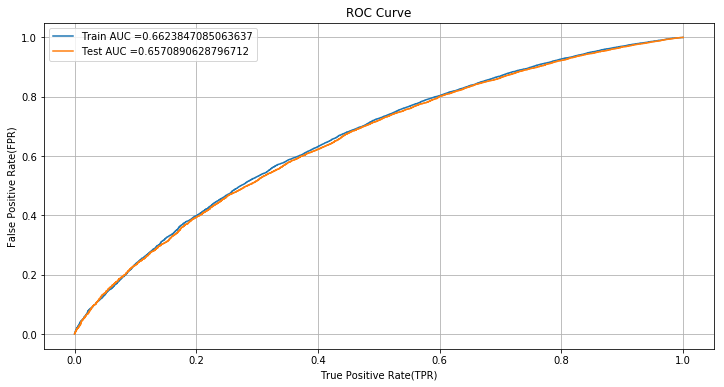

In [306]:
# https://scikitlearn.org/stable/modules/generated/sklearn.metrics.roc_curve.html#sklearn.metrics.roc_curve
from sklearn.metrics import roc_curve, auc
from sklearn.linear_model import LogisticRegression,SGDClassifier

model = SGDClassifier(loss='log', alpha= best_a, class_weight='balanced')

model.fit(X_tr_set2_fts, y_train)
# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
# not the predicted outputs
y_train_pred = batch_predict(model, X_tr_set2_fts)
y_test_pred = batch_predict(model, xte_ft_imp)
train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)
plt.plot(train_fpr, train_tpr, label="Train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="Test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("True Positive Rate(TPR)")
plt.ylabel("False Positive Rate(FPR)")
plt.title("ROC Curve")
plt.grid(True)
plt.show()

In [307]:
# we are writing our own function for predict, with defined threshold
# we will pick a threshold that will give the least fpr
def predict(proba, threshould, fpr, tpr):
    
    t = threshould[np.argmax(tpr*(1-fpr))]
    
    # (tpr*(1-fpr)) will be maximum if your fpr is very low and tpr is very high
    
    print("the maximum value of tpr*(1-fpr)", max(tpr*(1-fpr)), "for threshold", np.round(t,3))
    predictions = []
    for i in proba:
        if i>=t:
            predictions.append(1)
        else:
            predictions.append(0)
    return predictions

In [308]:
print("="*100)
from sklearn.metrics import confusion_matrix
print("Train confusion matrix")
print(confusion_matrix(y_train, predict(y_train_pred, tr_thresholds, train_fpr, train_tpr)))
print("Test confusion matrix")
print(confusion_matrix(y_test, predict(y_test_pred, tr_thresholds, train_fpr, train_tpr)))

Train confusion matrix
the maximum value of tpr*(1-fpr) 0.38109469477676156 for threshold 0.507
[[ 4817  2609]
 [17166 24449]]
Test confusion matrix
the maximum value of tpr*(1-fpr) 0.38109469477676156 for threshold 0.507
[[ 3522  1937]
 [12793 17800]]


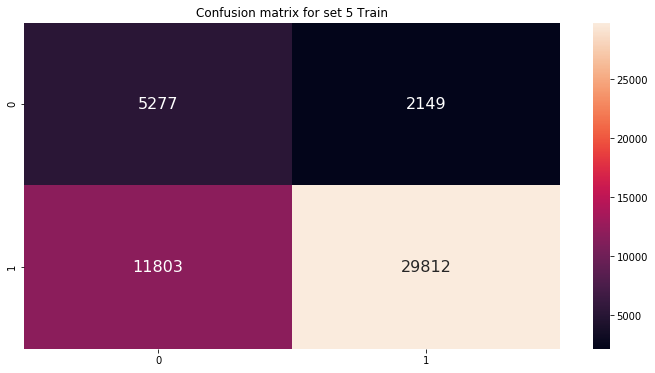

In [309]:
#How to plot confusion matrix using heat map - https://stackoverflow.com/questions/35572000/how-can-i-plot-a-confusion-matrix
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt
array = [[5277,2149],
        [11803,29812]]
df_cm = pd.DataFrame(array, index = [i for i in "01"],
                  columns = [i for i in "01"])
plt.figure
plt.title('Confusion matrix for set 5 Train')
sn.heatmap(df_cm, annot=True, annot_kws={"size":16}, fmt='g')

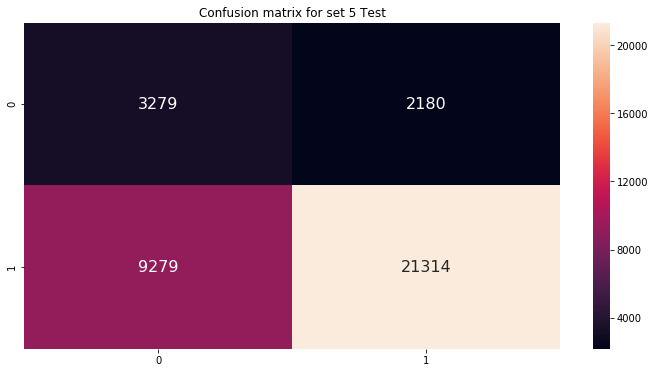

In [310]:
#How to plot confusion matrix using heat map - https://stackoverflow.com/questions/35572000/how-can-i-plot-a-confusion-matrix
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt
array = [[3279,2180], 
        [9279,21314]]
df_cm = pd.DataFrame(array, index = [i for i in "01"],
                  columns = [i for i in "01"])
plt.figure
plt.title('Confusion matrix for set 5 Test')
sn.heatmap(df_cm, annot=True, annot_kws={"size":16}, fmt='g')

<h1>3. Conclusion</h1>

In [4]:
# Please compare all your models using Prettytable library
# Please compare all your models using Prettytable library
# http://zetcode.com/python/prettytable/
from prettytable import PrettyTable
#If you get a ModuleNotFoundError error , install prettytable using: pip3 install prettytable
x = PrettyTable()
x.field_names = ["Vectorizer", "Model", "Alpha",  "Max Depth", "Min Sample Split", "Test AUC"]
x.add_row(["BOW", "Decision Tree", "NA", "10", "500", "0.68"])
x.add_row(["TFIDF", "Decision Tree", "NA", "5", "500", "0.67"])
x.add_row(["AVG W2V", "Decision Tree", "NA", "5", "500", "0.66"])
x.add_row(["TFIDF W2V", "Decision Tree", "NA", "5", "500", "0.66"])
x.add_row(["TFIDF", "Logistic Regression", 0.0001, "NA", "NA", "0.65"])
print(x)

+------------+---------------------+--------+-----------+------------------+----------+
| Vectorizer |        Model        | Alpha  | Max Depth | Min Sample Split | Test AUC |
+------------+---------------------+--------+-----------+------------------+----------+
|    BOW     |    Decision Tree    |   NA   |     10    |       500        |   0.68   |
|   TFIDF    |    Decision Tree    |   NA   |     5     |       500        |   0.67   |
|  AVG W2V   |    Decision Tree    |   NA   |     5     |       500        |   0.66   |
| TFIDF W2V  |    Decision Tree    |   NA   |     5     |       500        |   0.66   |
|   TFIDF    | Logistic Regression | 0.0001 |     NA    |        NA        |   0.65   |
+------------+---------------------+--------+-----------+------------------+----------+
